In [ ]:
# 그래프 시각화 한글 처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 코드 실행 후 런타임 다시 시작 --> 해당 셀 제외하고 코드 실행

In [ ]:
!pip install lifelines

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
#import datetime
#import scipy.stats

%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
#import re

In [ ]:
import lifelines
from lifelines import NelsonAalenFitter
from lifelines.plotting import plot_lifetimes
from lifelines.statistics import logrank_test

# 취소 EDA

In [ ]:
dfA = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_A_new.csv')
dfB = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_B_new.csv')
dfC = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_C_new.csv')

In [ ]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179165 entries, 0 to 1179164
Data columns (total 35 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   입장권고유번호   1179165 non-null  object 
 1   delta     1179165 non-null  int64  
 2   y         1179165 non-null  int64  
 3   group     1179165 non-null  object 
 4   성별        1179165 non-null  int64  
 5   단독판매여부    1179165 non-null  bool   
 6   예매금액      1179165 non-null  int64  
 7   교통개수      1179165 non-null  int64  
 8   팔로워합      1179165 non-null  float64
 9   좌석등급개수    1179165 non-null  int64  
 10  공연별전사코개수  1179165 non-null  int64  
 11  강수        1179165 non-null  float64
 12  공연시설인기    1179165 non-null  object 
 13  세부장르명     1179165 non-null  object 
 14  미세먼지등급    1179165 non-null  float64
 15  공연_요일     1179165 non-null  object 
 16  공연_평일주말   1179165 non-null  object 
 17  공연_월      1179165 non-null  int64  
 18  예매_요일     1179165 non-null  object 
 19  예매_평일주말   1179165 non

In [ ]:
ecode = []
ecode += dfA['입장권고유번호'].tolist()
ecode += dfB['입장권고유번호'].tolist()
ecode += dfC['입장권고유번호'].tolist()
ecode = list(set(ecode))
print(len(ecode))

3600784


In [ ]:
ym = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique_outsource_공연장.csv', usecols=['입장권고유번호', '취소일', '예매일', '공연일시']).drop_duplicates()

In [ ]:
ym = ym[ym['입장권고유번호'].isin(ecode)]

In [ ]:
ym = ym.dropna()

In [ ]:
date_columns = ['취소일','예매일', '공연일시']
for column in date_columns:
    ym[column] = pd.to_datetime(ym[column]).dt.date
ym['Time(%)'] = (ym['취소일'] - ym['예매일'] + pd.Timedelta(days=1)) / (ym['공연일시'] - ym['예매일'] + pd.Timedelta(days=1)) * 100

<Axes: xlabel='Time(%)', ylabel='Density'>

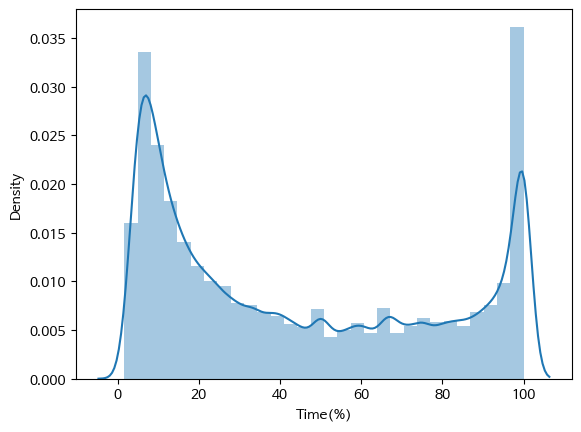

In [ ]:
# 전체
sns.distplot(ym['Time(%)'], bins=30)

In [ ]:
ymA = ym[ym['입장권고유번호'].isin(dfA['입장권고유번호'].tolist())]
ymA = ymA.dropna()
ymB = ym[ym['입장권고유번호'].isin(dfB['입장권고유번호'].tolist())]
ymB = ymB.dropna()
ymC = ym[ym['입장권고유번호'].isin(dfC['입장권고유번호'].tolist())]
ymC = ymC.dropna()

Text(0.5, 1.0, '예매점유율 하')

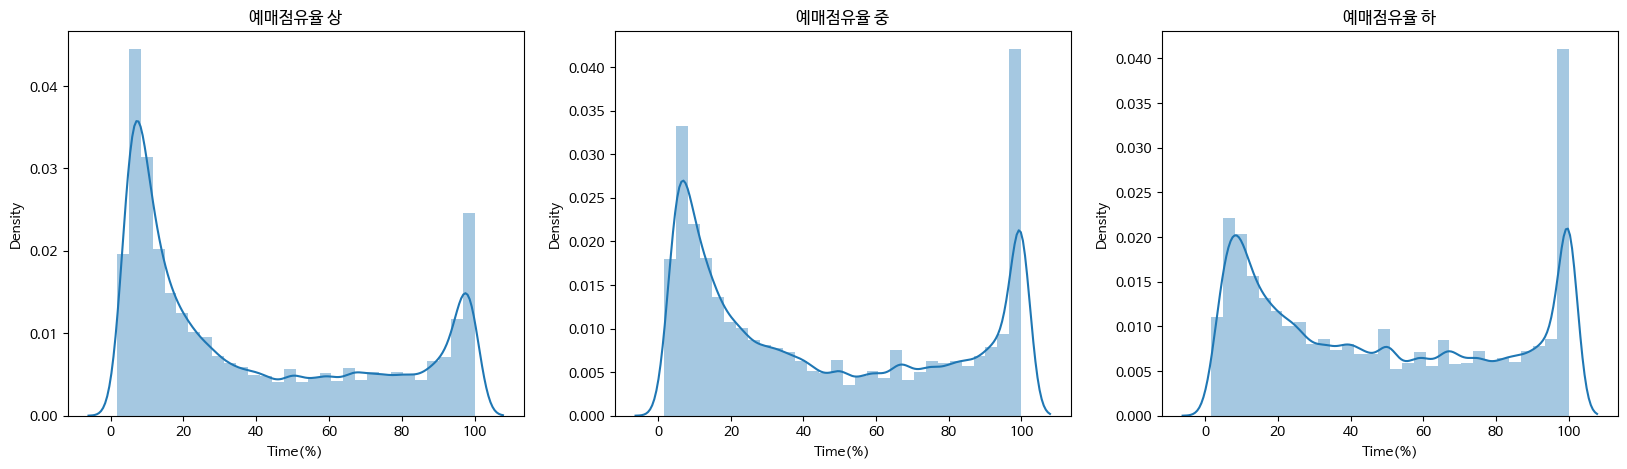

In [ ]:
col_n = 3
row_n = 1

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

sns.distplot(ymA['Time(%)'], bins=30, ax=ax[0])
ax[0].set_title('예매점유율 상')
sns.distplot(ymB['Time(%)'], bins=30, ax=ax[1])
ax[1].set_title('예매점유율 중')
sns.distplot(ymC['Time(%)'], bins=30, ax=ax[2])
ax[2].set_title('예매점유율 하')

In [ ]:
print(dfA['delta'].value_counts(normalize=True))
print(dfB['delta'].value_counts(normalize=True))
print(dfC['delta'].value_counts(normalize=True))

0    0.687779
1    0.312221
Name: delta, dtype: float64
0    0.66469
1    0.33531
Name: delta, dtype: float64
0    0.692108
1    0.307892
Name: delta, dtype: float64


groupA median survival time :  70.0
groupA median survival time :  60.0
groupA median survival time :  53.0


Text(0.5, 1.0, 'Survival of different group')

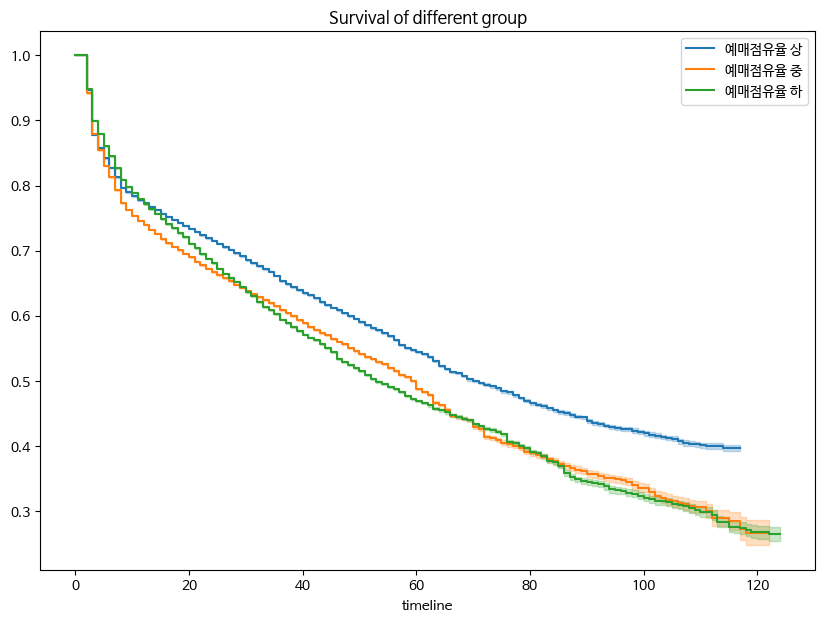

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
kmf = lifelines.KaplanMeierFitter()

kmf.fit(durations = dfA['y'], event_observed = dfA['delta'], label = '예매점유율 상')
print('groupA median survival time : ', kmf.median_survival_time_)
kmf.plot_survival_function(ax = ax)
kmf.fit(durations = dfB['y'], event_observed = dfB['delta'], label = '예매점유율 중')
print('groupA median survival time : ', kmf.median_survival_time_)
kmf.plot_survival_function(ax = ax)
kmf.fit(durations = dfC['y'], event_observed = dfC['delta'], label = '예매점유율 하')
print('groupA median survival time : ', kmf.median_survival_time_)
kmf.plot_survival_function(ax = ax)
plt.title("Survival of different group")

In [ ]:
# groupA vs groupB
output = logrank_test(durations_A = dfA['y'],
                      durations_B = dfB['y'],
                      event_observed_A = dfA['delta'],
                      event_observed_B = dfB['delta'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        4653.51 <0.005       inf>

In [ ]:
# groupA vs groupC
output = logrank_test(durations_A = dfA['y'],
                      durations_B = dfC['y'],
                      event_observed_A = dfA['delta'],
                      event_observed_B = dfC['delta'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        2793.93 <0.005       inf>

In [ ]:
# groupB vs groupC
output = logrank_test(durations_A = dfB['y'],
                      durations_B = dfC['y'],
                      event_observed_A = dfB['delta'],
                      event_observed_B = dfC['delta'])
output.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         251.74 <0.005    185.91>

In [ ]:
naf = NelsonAalenFitter()
naf.fit(dfA["y"],event_observed = dfA["delta"])
print (naf.cumulative_hazard_)
naf.plot()

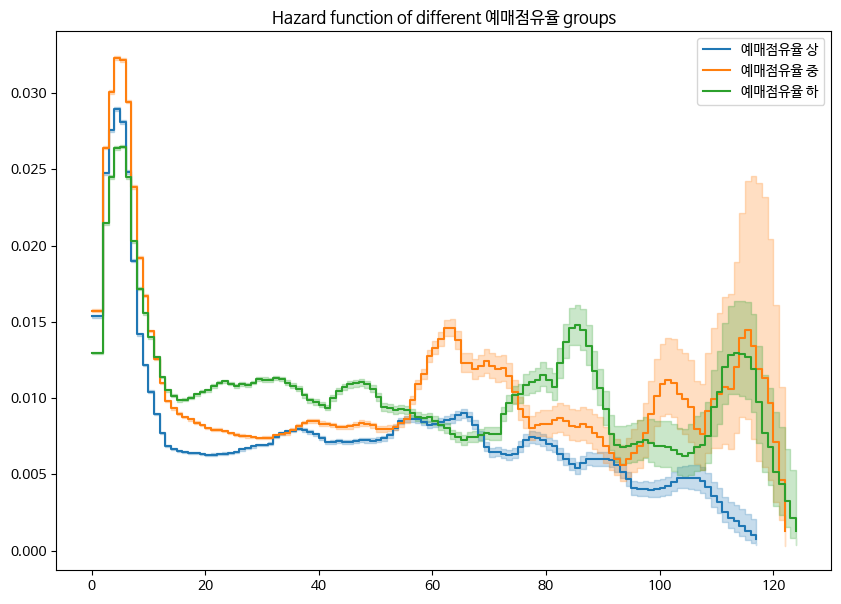

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
bw = 5
naf = NelsonAalenFitter()
naf.fit(dfA["y"],event_observed = dfA["delta"], label = '예매점유율 상')
ax = naf.plot_hazard(bandwidth=bw)
naf.fit(dfB["y"],event_observed = dfB["delta"], label = '예매점유율 중')
ax = naf.plot_hazard(bandwidth=bw)
naf.fit(dfC["y"],event_observed = dfC["delta"], label = '예매점유율 하')
ax = naf.plot_hazard(bandwidth=bw)

plt.title("Hazard function of different 예매점유율 groups");

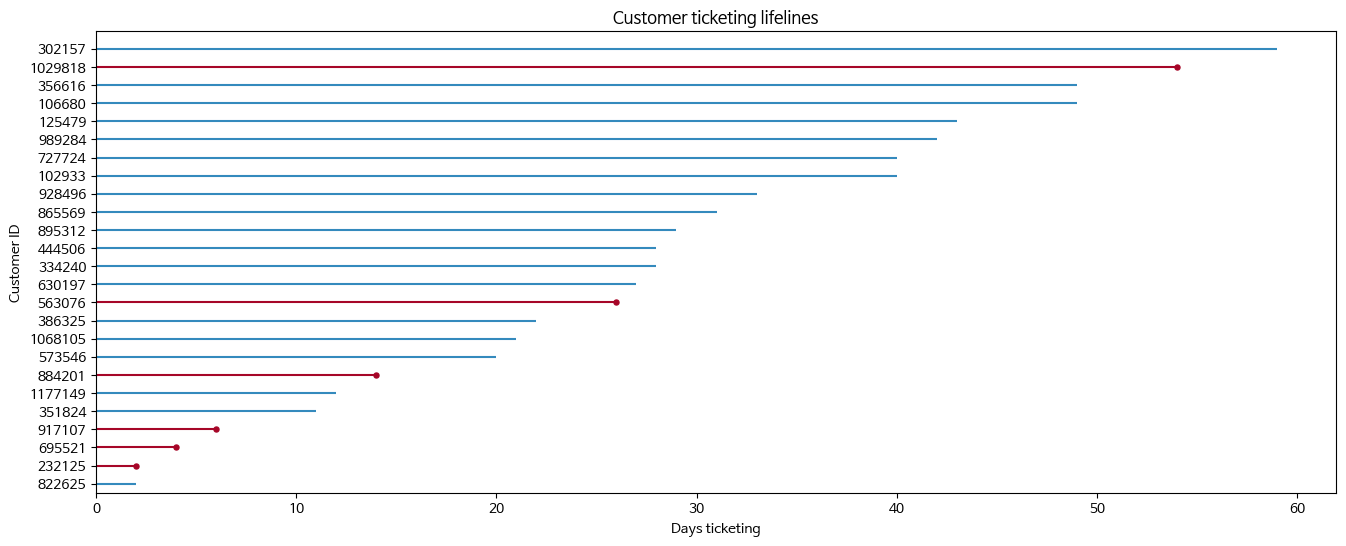

In [ ]:
sample = dfA.sample(25, replace=False)
time = sample['y']
status = sample['delta']
plt.figure(figsize=(16, 6));
plot_lifetimes(time, status)
plt.xlabel('Days ticketing');
plt.ylabel('Customer ID');
plt.title('Customer ticketing lifelines');

In [ ]:
dfB[(dfB['y']>50) & (dfB['y']<80)]

,입장권고유번호,delta,y,group,성별,단독판매여부,예매금액,교통개수,팔로워합,수상실적개수,...,좌석점유율,할인종류개수,결제수단코드,예매방식코드,할인종류코드,할인율,일일확진자,예매가능공연개수,공-예,시설합
55849,2403617555900043,0,51,C,2,False,105000,33,28733.0,0,...,0.274473,4,5.0,1.0,99.0,0.3,2614,1.0,51,10
55883,1428924061_1,0,51,C,2,False,105000,33,28733.0,0,...,0.274473,4,4.0,2.0,99.0,0.0,2614,0.0,51,10
55887,1428924273_1,0,51,C,1,False,105000,33,28733.0,0,...,0.274473,4,99.0,1.0,99.0,0.0,2614,0.0,51,10
55893,1428924652_1,0,51,C,2,False,105000,33,28733.0,0,...,0.274473,4,4.0,2.0,99.0,0.0,2614,0.0,51,10
58812,1428925548_1,0,52,C,2,False,105000,33,28733.0,0,...,0.274473,7,2.0,2.0,99.0,0.0,2007,0.0,52,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225528,T2076601970,0,51,D,0,True,150000,14,94415.0,0,...,0.922848,0,2.0,99.0,99.0,0.0,11593,102.0,51,8
1225529,T2076601971,0,51,D,0,True,120000,14,94415.0,0,...,0.922848,0,2.0,99.0,99.0,0.0,11593,102.0,51,8
1225530,T2076857040,0,51,D,2,True,150000,14,94415.0,0,...,0.922848,0,2.0,2.0,99.0,0.0,11593,102.0,51,8
1225531,T2077239810,0,51,D,2,True,81000,14,94415.0,0,...,0.922848,0,2.0,2.0,99.0,0.0,11593,100.0,51,8


# YM 취소내역 없애기

In [ ]:
ym = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2019YM.csv', usecols=['공연코드', '공연일시', '예매/취소일시', '입장권고유번호', '예매/취소구분', '예매/취소금액'])
ym

,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소금액
0,PF373404,2019-07-09 15:00,PTD5061906191646470,2019-06-19 16:46,1,0
1,PF373404,2019-07-09 15:00,PTD3901906222312030,2019-06-22 23:12,1,0
2,PF373404,2019-07-09 15:00,PTD5061906191646470,2019-07-08 09:54,2,0
3,PF373404,2019-07-09 19:00,PTD2531906102003380,2019-06-10 20:03,1,0
4,PF373404,2019-07-09 19:00,PTD4411906102218020,2019-06-10 22:18,1,0
...,...,...,...,...,...,...
12671795,PF374282,2019-12-31 15:00,1419391214_1,2019-12-24 19:14,1,35000
12671796,PF374282,2019-12-31 15:00,1419267408_1,2019-12-13 00:57,1,50000
12671797,PF374282,2019-12-31 15:00,1419267408_2,2019-12-13 00:57,1,50000
12671798,PF374282,2019-12-31 15:00,1419267408_1,2019-12-13 01:03,2,50000


In [ ]:
sample = ym.groupby(['공연코드', '공연일시', '입장권고유번호', '예매/취소구분']).size().unstack(fill_value=0)
sample

예매/취소구분                                        1  2
공연코드     공연일시             입장권고유번호                  
PF340236 2019-07-01 17:00 3837353214661600028  1  0
                          3837353214661600029  1  0
                          3837353214661700027  1  0
                          3837353214661700028  1  0
                          3837353214661700029  1  0
...                                           .. ..
PF428428 2019-10-06 19:00 T1516774820          1  1
                          T1516777170          1  0
                          T1516817790          1  0
                          T1516829320          1  0
                          T1516885610          1  0

[9589027 rows x 2 columns]

In [ ]:
sample[(sample[1]<sample[2]) & (sample[1]>0)]

예매/취소구분                                        1  2
공연코드     공연일시             입장권고유번호                  
PF361423 2019-11-14 20:00 M195300329102        1  2
                          M195300329103        1  2
PF370934 2019-12-15 15:00 PTD1991912101645560  1  2
PF373486 2019-09-07 19:00 7214669701200041     1  2
                          7214669701200042     1  2
PF379310 2019-12-21 18:00 13721464074900045    1  2
                          13721464074900046    1  2

In [ ]:
ym[ym['입장권고유번호']=='M195300329102']

,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소금액
10402830,PF361423,2019-11-14 20:00,M195300329102,2019-09-29 13:57,1,140000
10402981,PF361423,2019-11-14 20:00,M195300329102,2019-10-24 09:38,2,140000
10402983,PF361423,2019-11-14 20:00,M195300329102,2019-10-24 09:38,2,140000


In [ ]:
sample[sample[1]>2]

예매/취소구분                                        1  2
공연코드     공연일시             입장권고유번호                  
PF369113 2019-08-04 14:00 2697167208722600021  3  0
                          2697167208722600032  3  0
         2019-08-27 20:00 2702184209172500022  3  0
                          2702184209172500023  3  0
PF369327 2019-10-17 20:00 272080320762400046   3  0
                          272080320762400047   3  0
PF372761 2019-11-02 17:00 2724451207701600027  3  0
PF377644 2019-11-23 17:00 2019110500023480     3  0
PF377721 2019-11-29 20:00 2728966209692100017  3  0
                          2728966209692100018  3  0
         2019-12-20 20:00 2730966209951500016  3  0
                          2730966209951500017  3  0
         2019-12-25 18:30 2730496209972100057  3  0
                          2730496209972100058  3  0
         2019-12-29 14:00 2730197210071300017  3  0
                          2730197210071300018  3  0
                          2730197210071300019  3  0
PF378920 2019-11-16 19:00 2729071210181000056  3  0
                          2729071210181000057  3  0

In [ ]:
ym[ym['입장권고유번호']=='2697167208722600021']

,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,예매/취소금액
5817780,PF369113,2019-08-04 14:00,2697167208722600021,2019-08-04 11:54,1,60000
5817781,PF369113,2019-08-04 14:00,2697167208722600021,2019-08-04 11:54,1,60000
5817784,PF369113,2019-08-04 14:00,2697167208722600021,2019-08-04 11:54,1,60000


# 문제있는 전처리 하는 곳

2022YM_surv_unique.csv
- 판매시작일시 == 판매종료일시 drop
- 예매일 < 판매시작일시 drop

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique.csv')
df

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,판매기간,예매일,취소일,공연일시
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00
...,...,...,...,...,...,...,...,...,...,...
10677588,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 15:32:00,NaN,2022-12-31 23:30:00
10677589,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:30:00,2022-12-30 16:41:00,2022-12-31 23:30:00
10677590,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:34:00,NaN,2022-12-31 23:30:00
10677591,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:40:00,NaN,2022-12-31 23:30:00


In [ ]:
# 10677593 -> 10610037
df = df.drop(df[df['판매시작일시'] == df['판매종료일시']].index)

In [ ]:
# 10610037 -> 10245767
df = df.drop(df[df['판매시작일시'] > df['예매일']].index)

In [ ]:
df

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,판매기간,예매일,취소일,공연일시
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00
...,...,...,...,...,...,...,...,...,...,...
10677588,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 15:32:00,NaN,2022-12-31 23:30:00
10677589,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:30:00,2022-12-30 16:41:00,2022-12-31 23:30:00
10677590,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:34:00,NaN,2022-12-31 23:30:00
10677591,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30 16:40:00,NaN,2022-12-31 23:30:00


In [ ]:
df.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique.csv', index=False)

# Y, delta 만들기
- Y : 생존 기간
$$y_i = min(t_i, c_i)$$     
$$t_i = 취소일-예매일+1, c_i = 공연일시 - 예매일 +1$$
- delta : 생존 유무(1: 취소, 0: 예매)


In [ ]:
date_columns = ['예매일', '취소일', '공연일시']
for column in date_columns:
    df[column] = pd.to_datetime(df[column]).dt.date

In [ ]:
df['delta'] = df['취소일'].notnull().astype(int)
df

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,판매기간,예매일,취소일,공연일시,delta
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18,NaN,2022-04-18,0
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18,NaN,2022-04-18,0
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19,NaN,2022-04-19,0
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19,NaN,2022-04-19,0
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2,2022-04-19,NaN,2022-04-19,0
...,...,...,...,...,...,...,...,...,...,...,...
10245762,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0
10245763,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,2022-12-30,2022-12-31,1
10245764,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0
10245765,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0


In [ ]:
df['c'] = df['공연일시'] - df['예매일'] + pd.Timedelta(days=1)
df['t'] = df['취소일'] - df['예매일'] + pd.Timedelta(days=1)

In [ ]:
df

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,판매기간,예매일,취소일,공연일시,delta,c,t
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18,NaN,2022-04-18,0,1 days,NaT
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18,NaN,2022-04-18,0,1 days,NaT
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19,NaN,2022-04-19,0,1 days,NaT
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19,NaN,2022-04-19,0,1 days,NaT
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2,2022-04-19,NaN,2022-04-19,0,1 days,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245762,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0,2 days,NaT
10245763,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,2022-12-30,2022-12-31,1,2 days,1 days
10245764,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0,2 days,NaT
10245765,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0,2 days,NaT


In [ ]:
df['y'] = np.where(df['t'] < df['c'], df['t'], df['c'])
df['y'] = df['y'].dt.days

In [ ]:
df

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,판매기간,예매일,취소일,공연일시,delta,c,t,y
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18,NaN,2022-04-18,0,1 days,NaT,1
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,1,2022-04-18,NaN,2022-04-18,0,1 days,NaT,1
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19,NaN,2022-04-19,0,1 days,NaT,1
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2,2022-04-19,NaN,2022-04-19,0,1 days,NaT,1
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2,2022-04-19,NaN,2022-04-19,0,1 days,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10245762,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0,2 days,NaT,2
10245763,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,2022-12-30,2022-12-31,1,2 days,1 days,1
10245764,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0,2 days,NaT,2
10245765,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,10,2022-12-30,NaT,2022-12-31,0,2 days,NaT,2


In [ ]:
df['y'].describe()

count    1.024577e+07
mean     1.804018e+01
std      2.011815e+01
min      0.000000e+00
25%      2.000000e+00
50%      1.000000e+01
75%      3.000000e+01
max      2.150000e+02
Name: y, dtype: float64

In [ ]:
df[df['y']>200]

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,판매기간,예매일,취소일,공연일시,delta,c,t,y
7686147,FC222900,FC222900-01,PF312725,T1931043940,2022-05-02 00:00:00,2022-11-23 17:00:00,206,2022-05-03,NaT,2022-11-24,0,206 days,NaT,206
7686148,FC222900,FC222900-01,PF312725,T1931043941,2022-05-02 00:00:00,2022-11-23 17:00:00,206,2022-05-03,NaT,2022-11-24,0,206 days,NaT,206
7686155,FC222900,FC222900-01,PF312725,T1931056890,2022-05-02 00:00:00,2022-11-23 17:00:00,206,2022-05-03,NaT,2022-11-24,0,206 days,NaT,206
7686156,FC222900,FC222900-01,PF312725,T1931056891,2022-05-02 00:00:00,2022-11-23 17:00:00,206,2022-05-03,NaT,2022-11-24,0,206 days,NaT,206
7686158,FC222900,FC222900-01,PF312725,T1931057360,2022-05-02 00:00:00,2022-11-23 17:00:00,206,2022-05-03,NaT,2022-11-24,0,206 days,NaT,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253738,FC224992,FC224992-01,PF313884,T1953134060,2022-05-18 00:00:00,2022-12-21 17:00:00,218,2022-06-03,NaT,2022-12-22,0,203 days,NaT,203
9253739,FC224992,FC224992-01,PF313884,T1953372460,2022-05-18 00:00:00,2022-12-21 17:00:00,218,2022-06-03,NaT,2022-12-22,0,203 days,NaT,203
9253740,FC224992,FC224992-01,PF313884,T1953774910,2022-05-18 00:00:00,2022-12-21 17:00:00,218,2022-06-03,NaT,2022-12-22,0,203 days,NaT,203
9253741,FC224992,FC224992-01,PF313884,T1953786910,2022-05-18 00:00:00,2022-12-21 17:00:00,218,2022-06-04,NaT,2022-12-22,0,202 days,NaT,202


In [ ]:
df2 = df[['입장권고유번호', 'delta', 'y']]
df2

,입장권고유번호,delta,y
0,W2229628466001,0,1
1,W2229628466002,0,1
2,W2229226914001,0,1
3,W2229226914002,0,1
4,W2250065445001,0,1
...,...,...,...
10245762,39539086152200047,0,2
10245763,39539092431600024,1,1
10245764,39539092822300035,0,2
10245765,39539093471400046,0,2


In [ ]:
df2.isnull().sum()

입장권고유번호    0
delta      0
y          0
dtype: int64

In [ ]:
df2.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/survival_df.csv', index=False)

# Survival Analysis

## EDA new version

In [ ]:
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf.csv')
sdf.set_index('입장권고유번호', inplace=True)
sdf

,delta,y,group,장르명,성별,단독판매여부,예매금액,취소금액,교통개수,팔로워합,...,공연_월,공연_오전오후,예매_요일,예매_평일주말,예매_월,예매_오전오후,취소_요일,취소_평일주말,취소_월,취소_오전오후
입장권고유번호,,,,,,,,,,,,,,,,,,,,,
W2279023752001,0,2,A,뮤지컬,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오전,NaN,NaN,NaN,NaN
W2221045657001,0,2,A,뮤지컬,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오전,NaN,NaN,NaN,NaN
W2280490992001,0,2,A,뮤지컬,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오후,NaN,NaN,NaN,NaN
W2218597478001,0,2,A,뮤지컬,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오후,NaN,NaN,NaN,NaN
W2229557520001,0,2,A,뮤지컬,0,False,35500,0,26,0.0,...,4,오후,Monday,평일,4,오후,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39539083541800027,0,2,A,대중음악,2,False,88000,0,53,0.0,...,12,오후,Friday,평일,12,오후,NaN,NaN,NaN,NaN
39539086152200047,0,2,A,대중음악,1,False,88000,0,53,0.0,...,12,오후,Friday,평일,12,오후,NaN,NaN,NaN,NaN
39539092822300035,0,2,A,대중음악,1,False,88000,0,53,0.0,...,12,오후,Friday,평일,12,오후,NaN,NaN,NaN,NaN


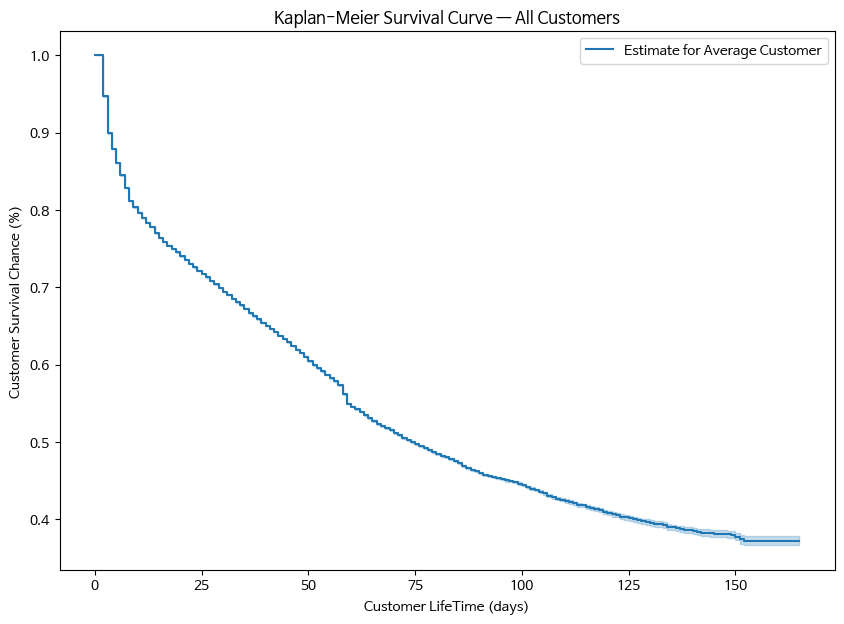

In [ ]:
# fitting kmf to churn data
t = sdf['y'].values
delta = sdf['delta'].values
kmf = lifelines.KaplanMeierFitter()
kmf.fit(t, event_observed=delta, label='Estimate for Average Customer')
# plotting kmf curve
fig, ax = plt.subplots(figsize=(10,7))
kmf.plot(ax=ax)
ax.set_title('Kaplan-Meier Survival Curve — All Customers')
ax.set_xlabel('Customer LifeTime (days)')
ax.set_ylabel('Customer Survival Chance (%)')
plt.show()

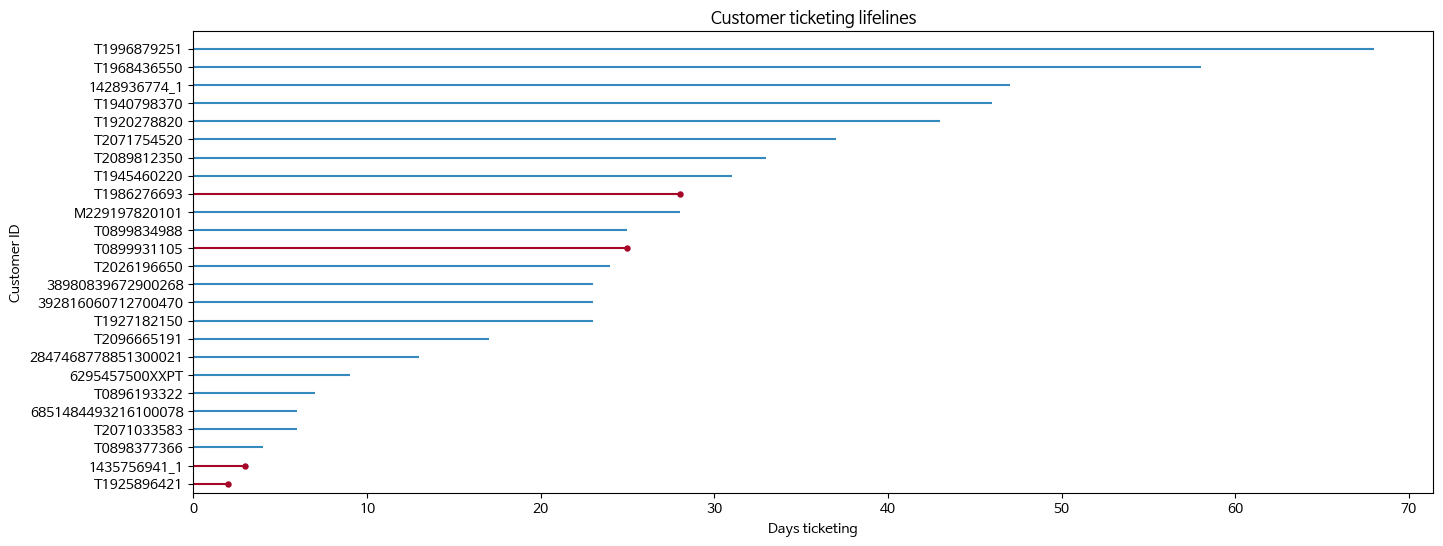

In [ ]:
sample = sdf.sample(25, replace=False)
time = sample['y']
status = sample['delta']
plt.figure(figsize=(16, 6));
plot_lifetimes(time, status)
plt.xlabel('Days ticketing');
plt.ylabel('Customer ID');
plt.title('Customer ticketing lifelines');

In [ ]:
T= sdf['y'].values
E = sdf['delta'].values

In [ ]:
sdf.sort_values(by = ['장르명'])["장르명"].unique()

array(['대중음악', '뮤지컬', '연극'], dtype=object)

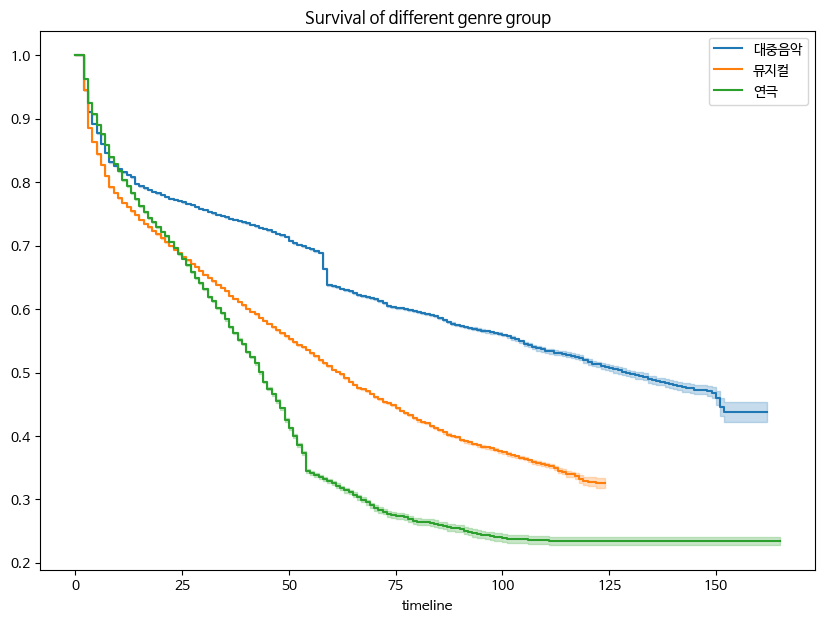

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
genre_types = sdf.sort_values(by = ['장르명'])["장르명"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, genre in enumerate(genre_types):
  ix = sdf['장르명'] == genre
  kmf.fit(durations = T[ix], event_observed = E[ix], label = genre)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different genre group")

In [ ]:
musical = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/sdf_musical.csv')
musical.set_index('입장권고유번호', inplace=True)
musical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3621241 entries, W2279023752001 to 1438640862_1
Data columns (total 35 columns):
 #   Column    Dtype  
---  ------    -----  
 0   delta     int64  
 1   y         int64  
 2   group     object 
 3   성별        int64  
 4   단독판매여부    bool   
 5   예매금액      int64  
 6   취소금액      int64  
 7   교통개수      int64  
 8   팔로워합      float64
 9   수상실적개수    int64  
 10  매출액       float64
 11  좌석등급개수    int64  
 12  무대시설      int64  
 13  예매할인율     float64
 14  공연별전사코개수  int64  
 15  강수        float64
 16  기온        float64
 17  습도        float64
 18  공연시설인기    object 
 19  편의시설      int64  
 20  장애인시설     int64  
 21  주차시설      int64  
 22  세부장르명     object 
 23  아동공연 여부   bool   
 24  축제 여부     bool   
 25  내한공연 여부   bool   
 26  미세먼지등급    float64
 27  공연_요일     object 
 28  공연_평일주말   object 
 29  공연_월      int64  
 30  공연_오전오후   object 
 31  예매_요일     object 
 32  예매_평일주말   object 
 33  예매_월      int64  
 34  예매_오전오후   object 
dtypes: bool(4), float6

In [ ]:
musical.isnull().sum() # all 0

In [ ]:
T= musical['y'].values
E = musical['delta'].values

Text(0.5, 1.0, 'Survival of different gender group')

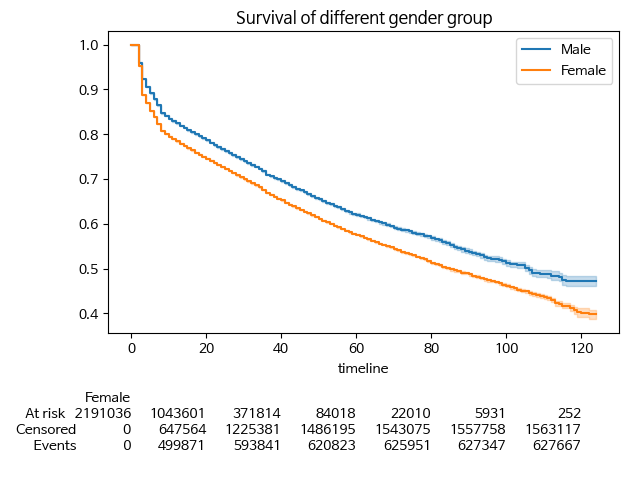

In [ ]:
ax = plt.subplot(111)
m = (musical["성별"] == 1)
f = (musical["성별"] == 2)
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[f], event_observed = E[f], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different gender group")

- 남자보다 여자가 예매일 후 더 급격하게 생존확률이 줄어들고 전반적으로 생존확률이 남자보다 더 낮음

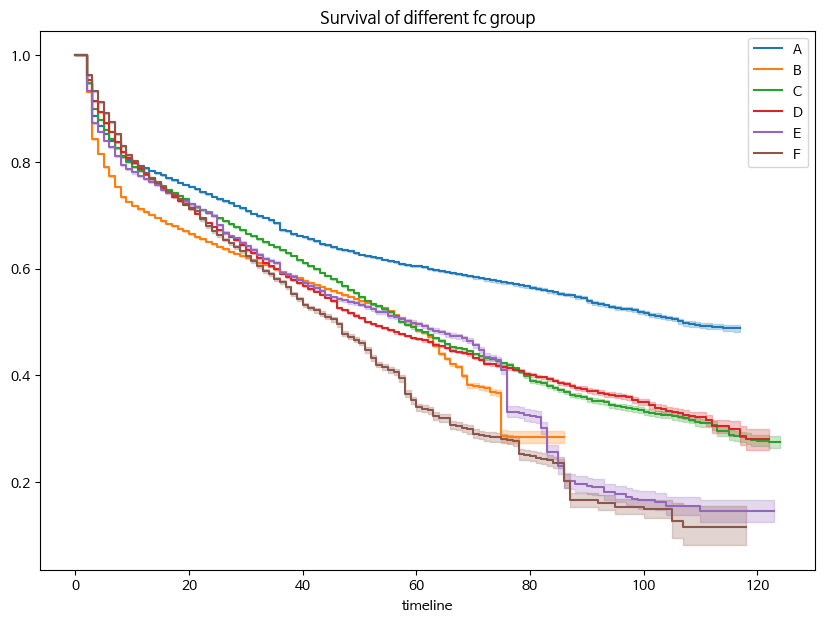

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
fc_types = musical.sort_values(by = ['공연시설인기'])["공연시설인기"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, fc in enumerate(fc_types):
  ix = musical['공연시설인기'] == fc
  kmf.fit(durations = T[ix], event_observed = E[ix], label = fc)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different fc group")

- 공연시설인기가 가장 높은 A가 생존확률이 가장 높음
- 공연시설인기가 가장 낮은 F가 생존확률이 가장 낮음
- 공연시설인기 B는 예매 후 10일 이내 또는 예매 후 75일 후 쯤 생존확률이 급감하는 구간이 있음
- 공연시설인기 E는 예매 후 80일 후 쯤 생존확률이 급감하는 구간 존재

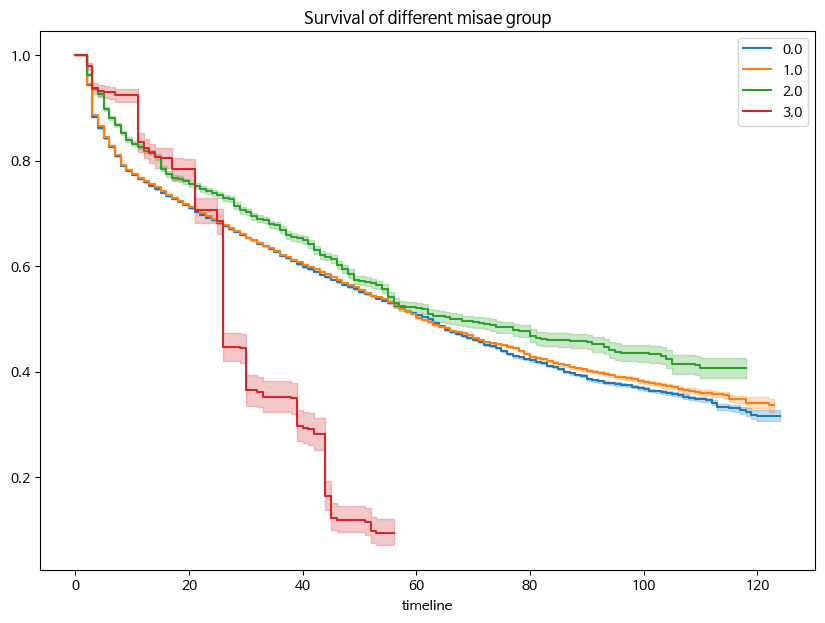

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
misae_types = musical.sort_values(by = ['미세먼지등급'])["미세먼지등급"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, misae in enumerate(misae_types):
  ix = musical['미세먼지등급'] == misae
  kmf.fit(durations = T[ix], event_observed = E[ix], label = misae)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different misae group")

- 미세먼지등급 3 무슨 일이지...?ㅎ
- 미세먼지등급 0과 1은 거의 차이 없음

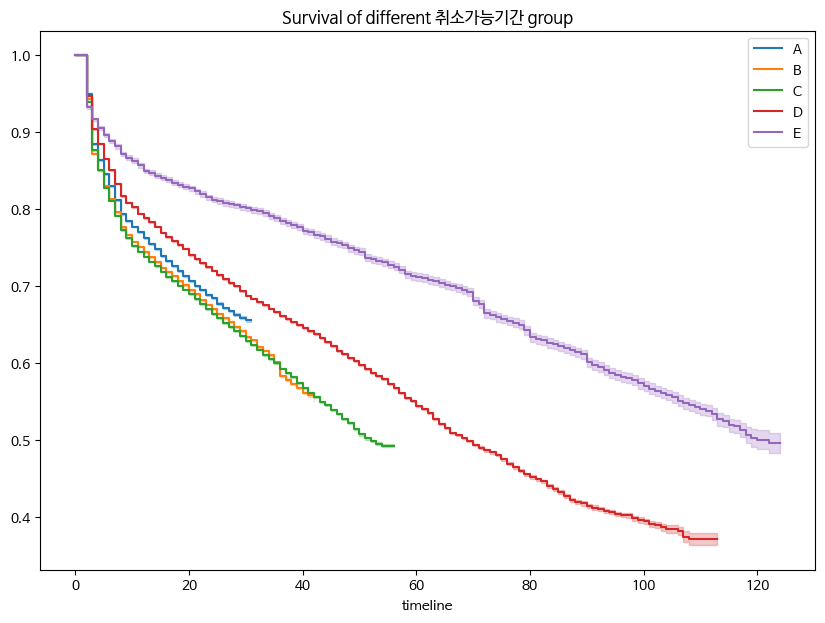

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
cspt_types = musical.sort_values(by = ['group'])["group"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, cspt in enumerate(cspt_types):
  ix = musical['group'] == cspt
  kmf.fit(durations = T[ix], event_observed = E[ix], label = cspt)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 취소가능기간 group")

- 공연일시와 예매일 차이가 가장 큰 group E의 생존확률이 가장 높음
- 공연일시와 예매일 차이가 작은 group A, B, C의 경우 예매일 직후 취소하는 경향이 많은 것으로 보임

Text(0.5, 1.0, 'Survival of different 단독판매 group')

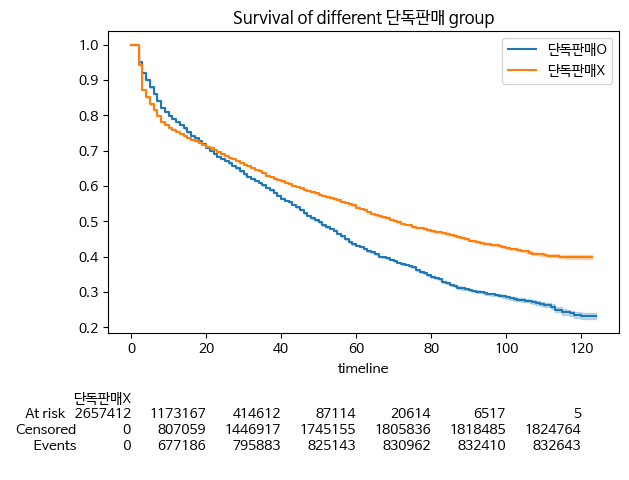

In [ ]:
ax = plt.subplot(111)
m = (musical["단독판매여부"] == True)
f = (musical["단독판매여부"] == False)
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations = T[m], event_observed = E[m], label = "단독판매O")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[f], event_observed = E[f], label = "단독판매X")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different 단독판매 group")

- 초반에는 단독판매가 아닐 경우의 생존확률이 더 낮지만 공연일시에 가까울수록 단독판매일 경우 생존확률이 더 낮아지는 경향

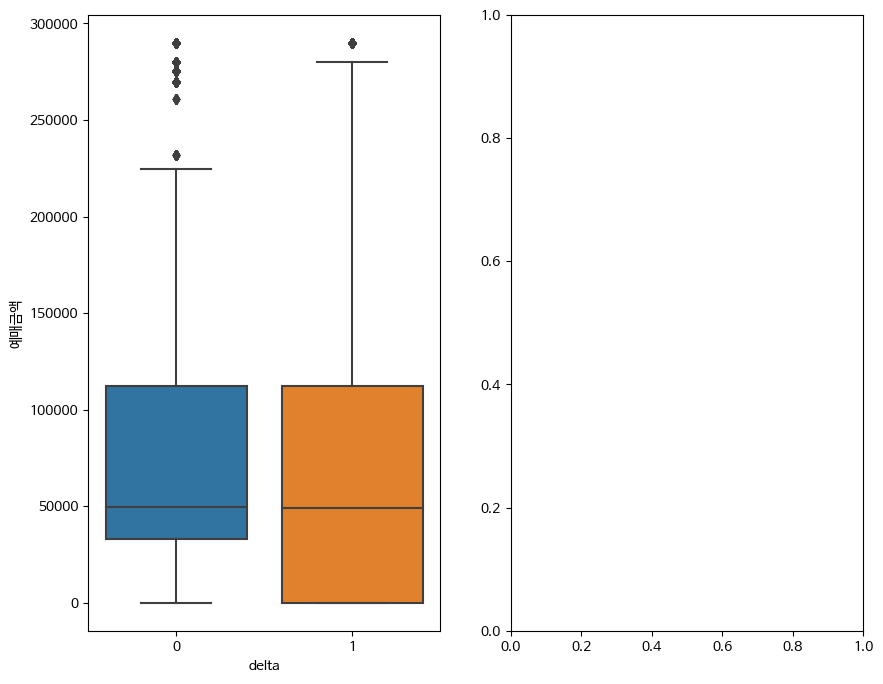

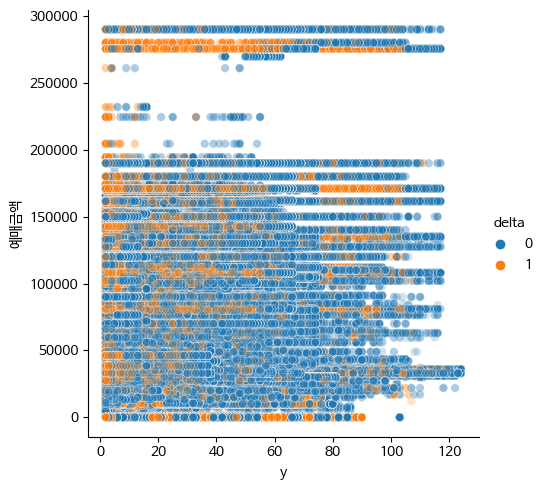

In [ ]:
# 예매금액 : 예매금액이 낮을수록 더 취소할 경향
fig, ax = plt.subplots(ncols=2, figsize=(10,8))
sns.boxplot(data=musical, x='delta', y='예매금액', ax=ax[0])
sns.relplot(x='y', y='예매금액', hue='delta', data=musical, alpha=0.2, ax=ax[1])

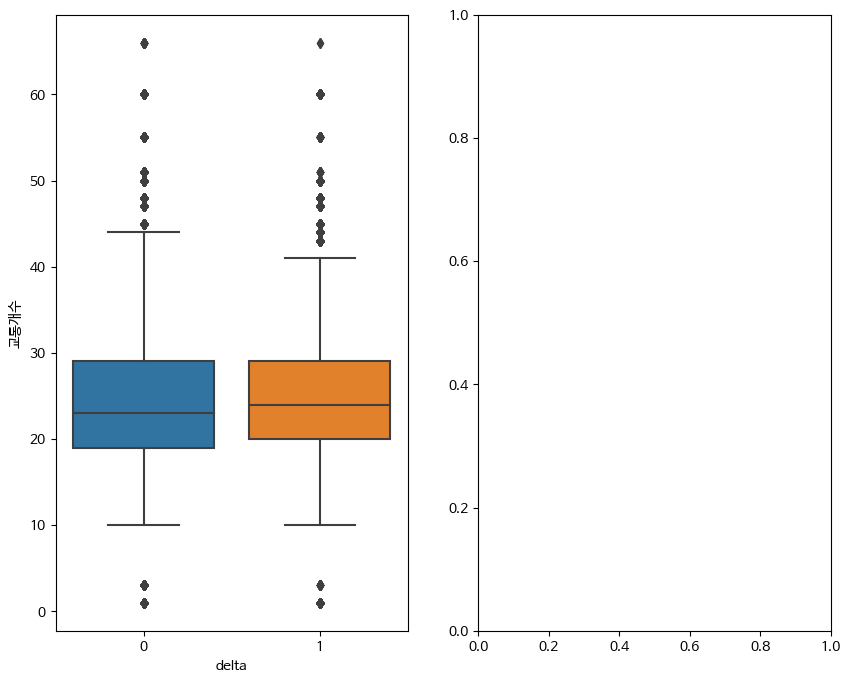

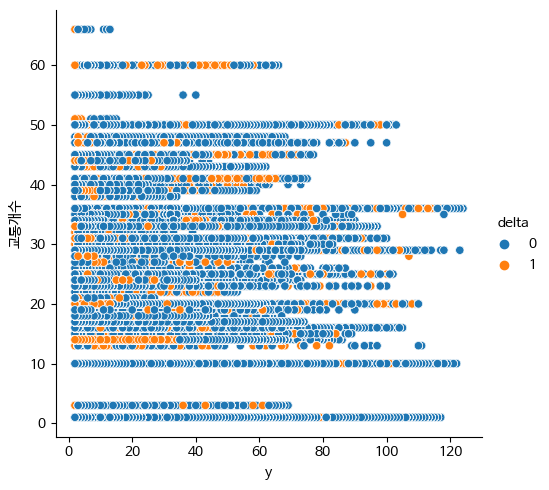

In [ ]:
# 교통개수 : 취소에 영향을 주지 않아보임
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.boxplot(data=musical, x='delta', y='교통개수', ax=ax[0])
sns.relplot(x='y', y='교통개수', hue='delta', data=musical, ax=ax[1])

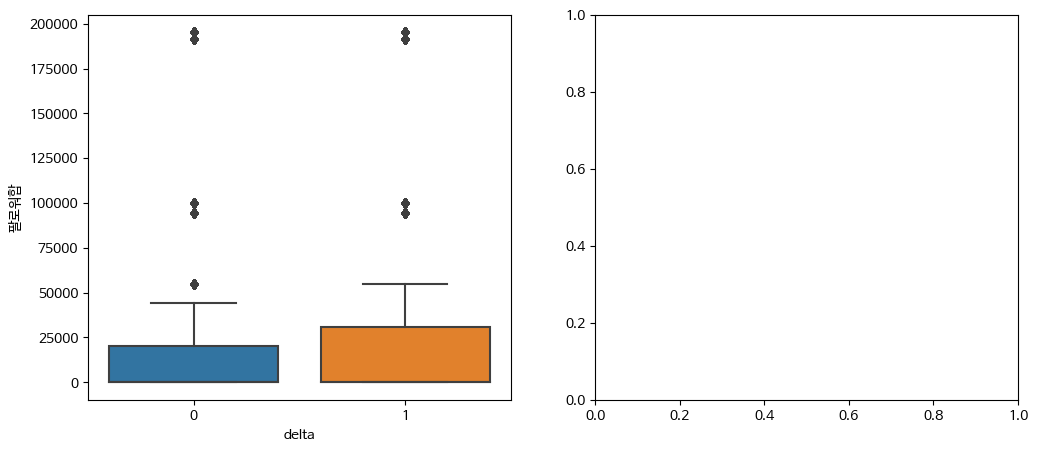

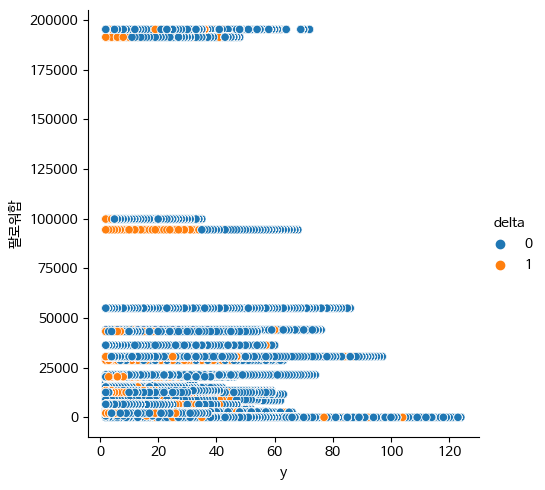

In [ ]:
# 팔로워합 : 얘도 딱히 취소에 영향을 안 미치는 듯..?
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
sns.boxplot(data=musical, x='delta', y='팔로워합', ax=ax[0])
sns.relplot(x='y', y='팔로워합', hue='delta', data=musical, ax=ax[1])

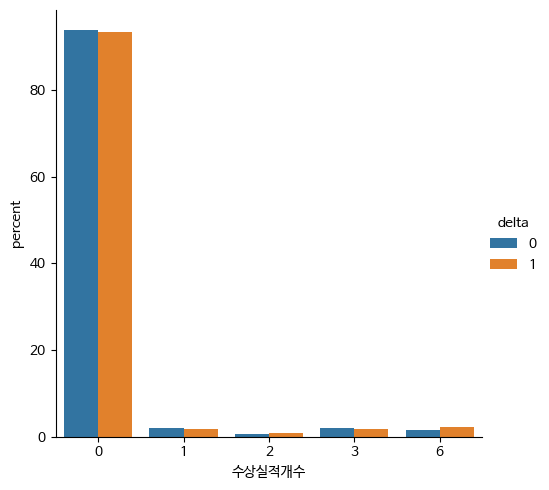

In [ ]:
# 수상실적개수
# 각 delta 그룹일 때 수상실적개수에 따른 percentage
# 뭐 크게 차이 없는 듯...?
x,y = '수상실적개수', 'delta'

(musical
.groupby(y)[x]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

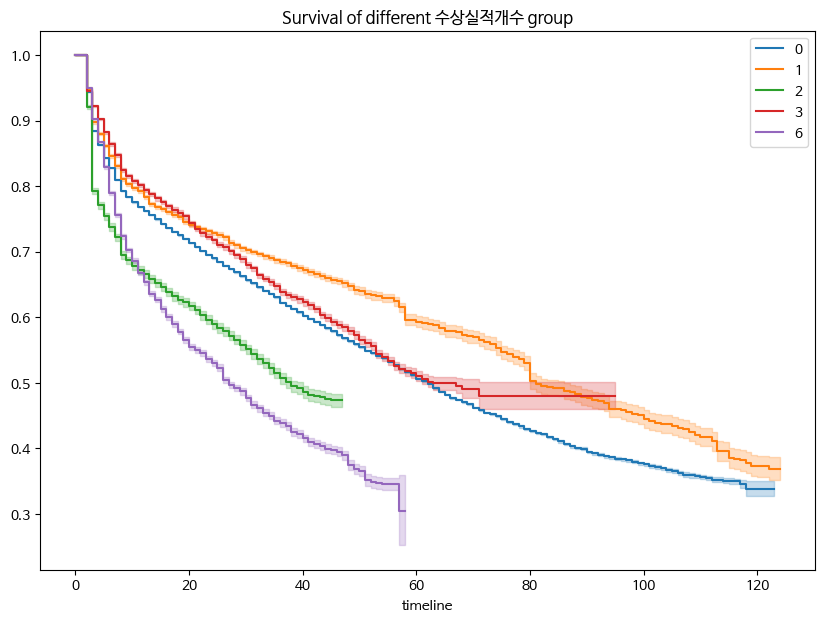

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ss_types = musical.sort_values(by = ['수상실적개수'])["수상실적개수"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(ss_types):
  ix = musical['수상실적개수'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 수상실적개수 group")

- 수상실적개수가 6일 때 생존확률이 가장 낮은걸 봐서는.... 상식적으로 수상실적개수가 예매취소에 영향을 주진 않은가보다

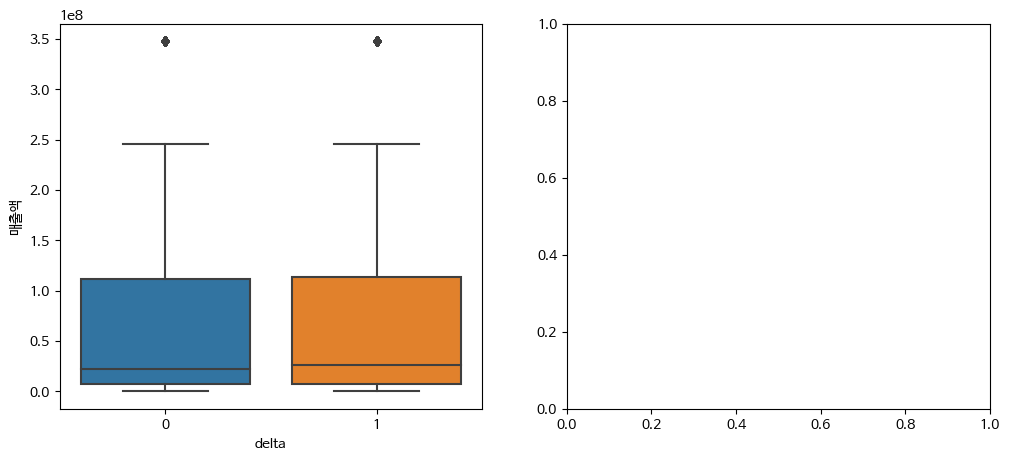

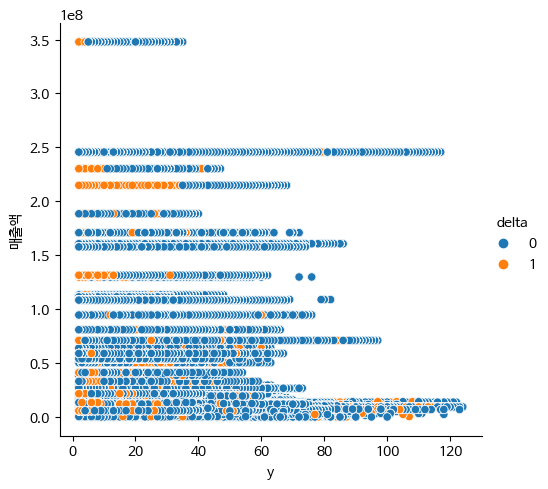

In [ ]:
# 매출액 : 얘도.... 취소에 영향 안 줘
fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
sns.boxplot(data=musical, x='delta', y='매출액', ax=ax[0])
sns.relplot(x='y', y='매출액', hue='delta', data=musical, ax=ax[1])

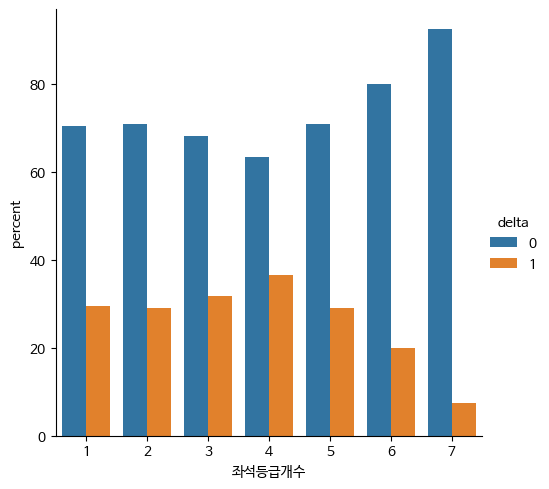

In [ ]:
# 좌석등급개수
# 각 delta 그룹일 때 수상실적개수에 따른 percentage
# 오 좌석등급개수에 따라 예매취소 경향 다름
x,y = '좌석등급개수', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

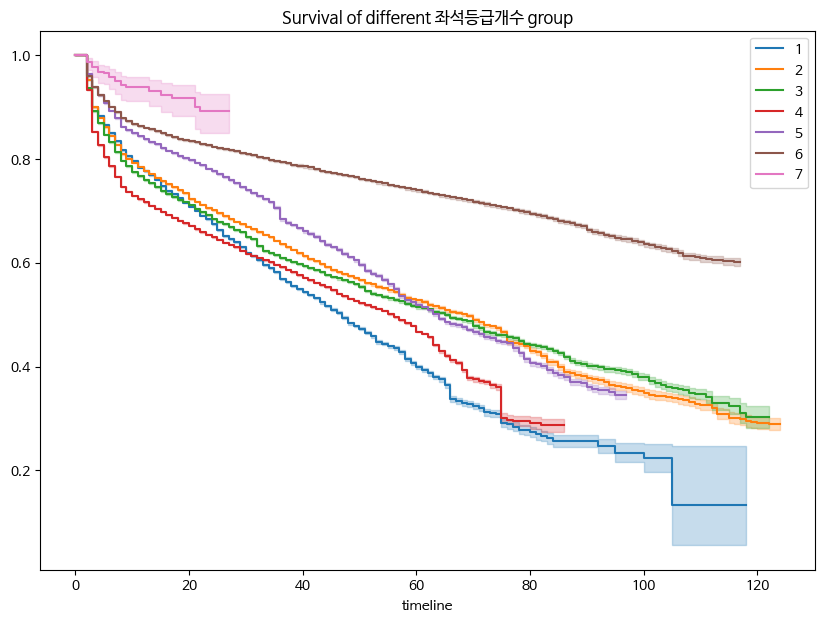

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
seat_types = musical.sort_values(by = ['좌석등급개수'])["좌석등급개수"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(seat_types):
  ix = musical['좌석등급개수'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 좌석등급개수 group")

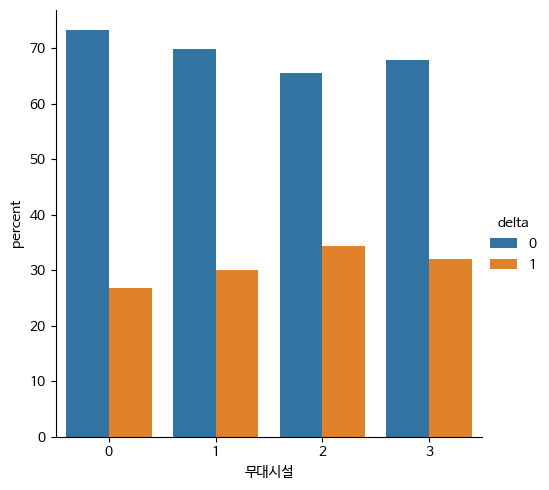

In [ ]:
# 무대시설
x,y = '무대시설', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

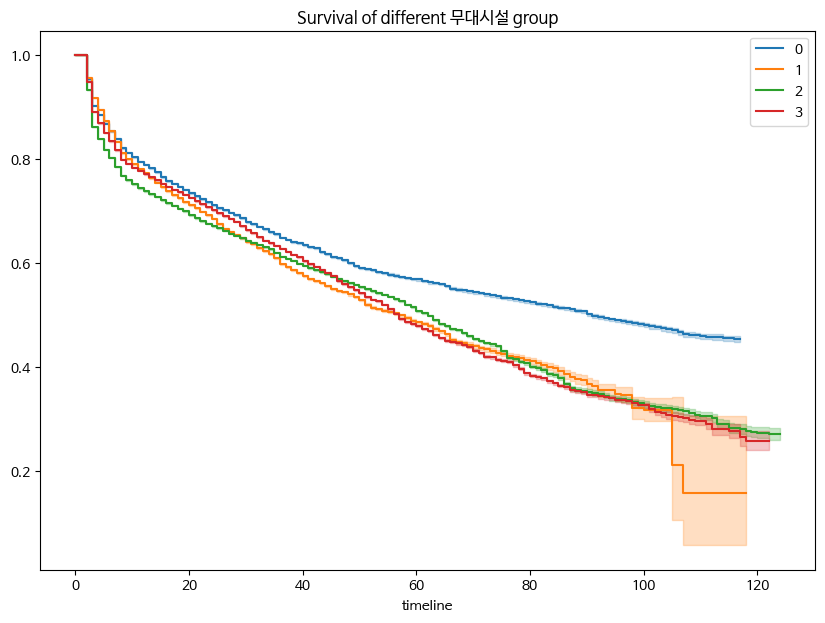

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
modae_types = musical.sort_values(by = ['무대시설'])["무대시설"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(modae_types):
  ix = musical['무대시설'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 무대시설 group")

<Axes: xlabel='delta', ylabel='예매할인율'>

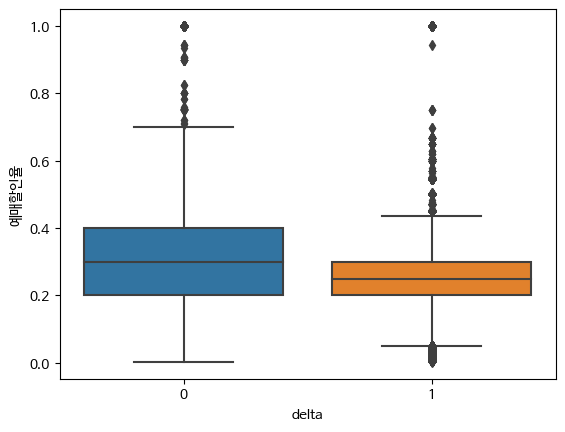

In [ ]:
sns.boxplot(data=musical[musical['예매할인율']!=0], x='delta', y='예매할인율')

In [ ]:
# 221005 기온 19.125, 습도 70.5, 강수 0
musical.loc[musical['기온']==-50, '기온'] = 19.125
musical.loc[musical['습도']<0, '습도'] = 70.5
musical.loc[musical['강수']<0, '강수'] = 0

<Axes: xlabel='기온', ylabel='Count'>

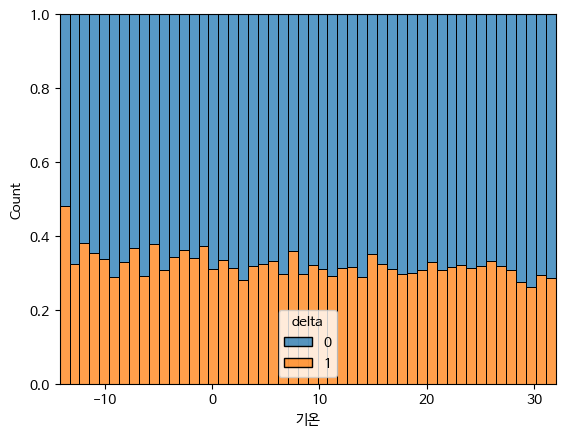

In [ ]:
sns.histplot(data=musical, x='기온', hue='delta', bins=50, multiple='fill')

<Axes: xlabel='강수', ylabel='Count'>

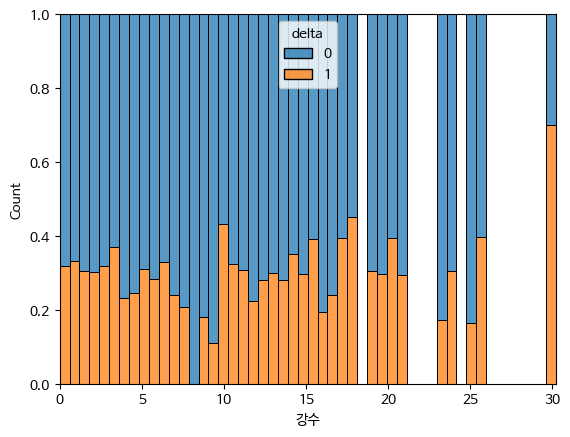

In [ ]:
sns.histplot(data=musical, x='강수', hue='delta', bins=50, multiple='fill')

<Axes: xlabel='습도', ylabel='Count'>

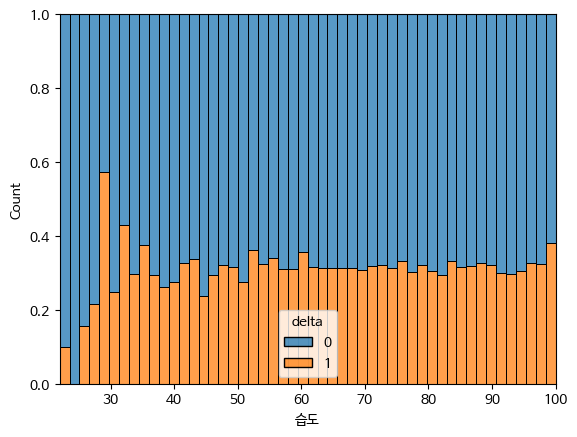

In [ ]:
sns.histplot(data=musical, x='습도', hue='delta', bins=50, multiple='fill')

In [ ]:
musical['불쾌지수'] = 0.81 * musical['기온'] + 0.01 * musical['습도'] * (0.99 * musical['기온'] - 14.3) + 46.3

<Axes: xlabel='불쾌지수', ylabel='Count'>

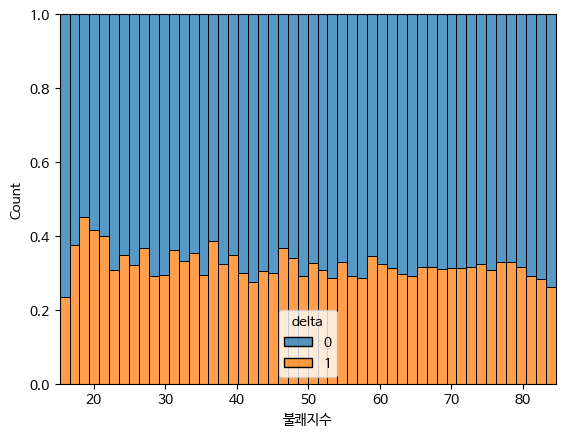

In [ ]:
sns.histplot(data=musical, x='불쾌지수', hue='delta', bins=50, multiple='fill')

<Axes: >

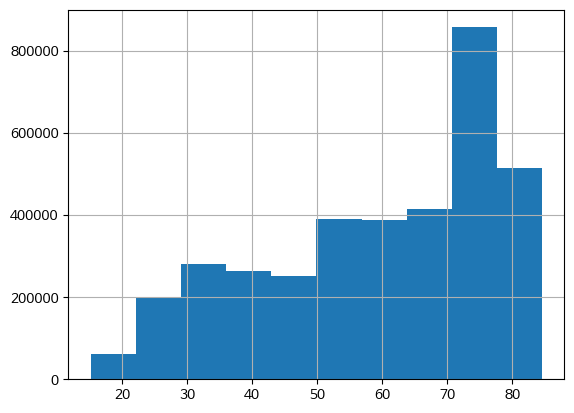

In [ ]:
musical['불쾌지수'].hist()

In [ ]:
musical['불쾌지수 구간'] = np.where(musical['불쾌지수'] < 68, '68미만',
                            np.where(musical['불쾌지수'] < 75, '68~75',
                                     np.where(musical['불쾌지수'] < 80, '75~80', '80이상')))

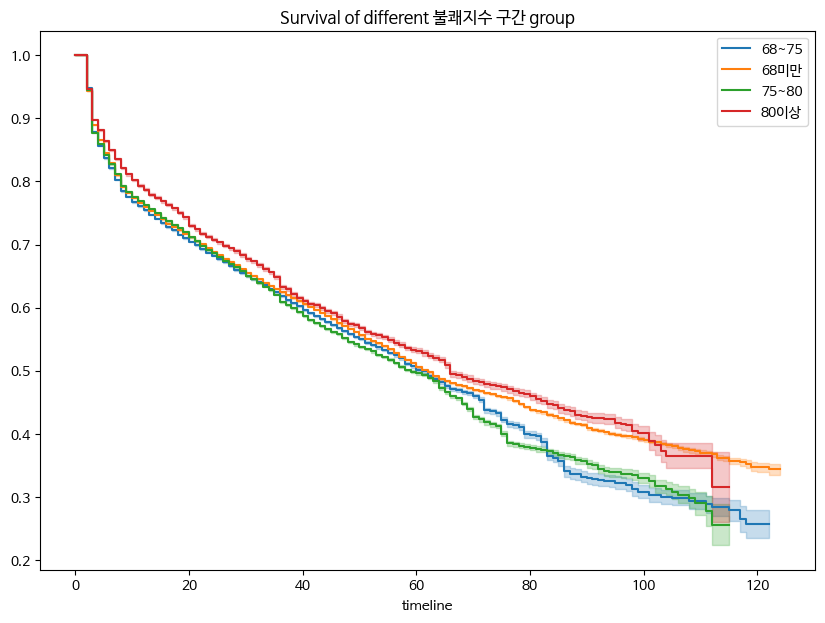

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
modae_types = musical.sort_values(by = ['불쾌지수 구간'])["불쾌지수 구간"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(modae_types):
  ix = musical['불쾌지수 구간'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 불쾌지수 구간 group")

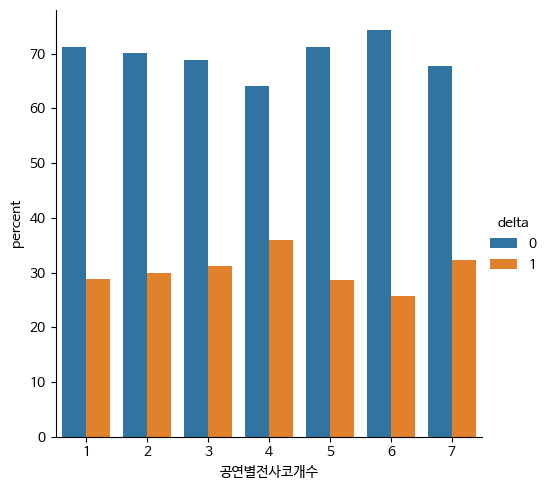

In [ ]:
# 공연별전사코개수
x,y = '공연별전사코개수', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

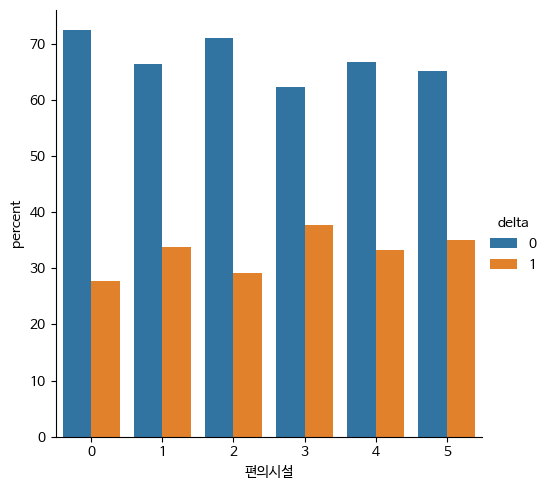

In [ ]:
# 편의시설
x,y = '편의시설', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

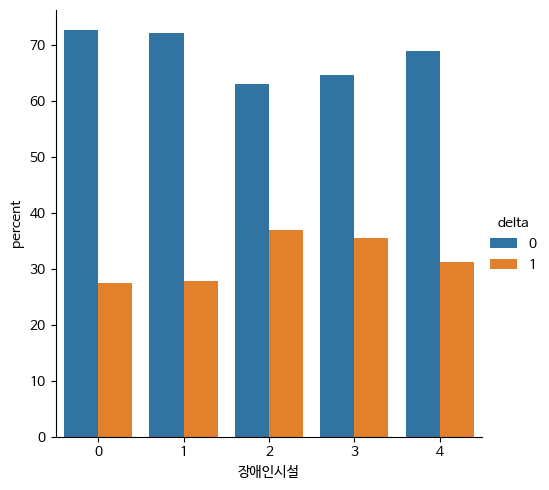

In [ ]:
# 장애인시설
x,y = '장애인시설', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

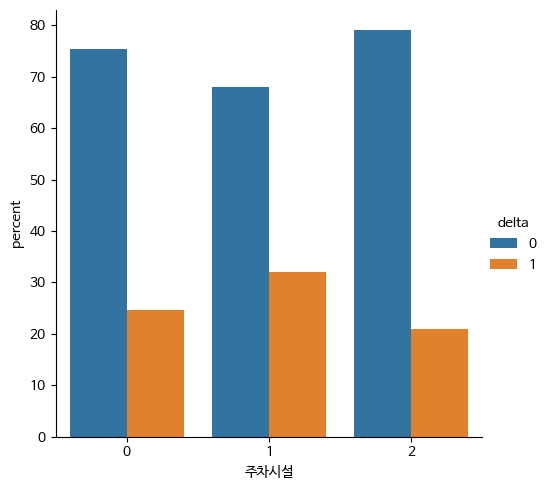

In [ ]:
# 주차시설
x,y = '주차시설', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

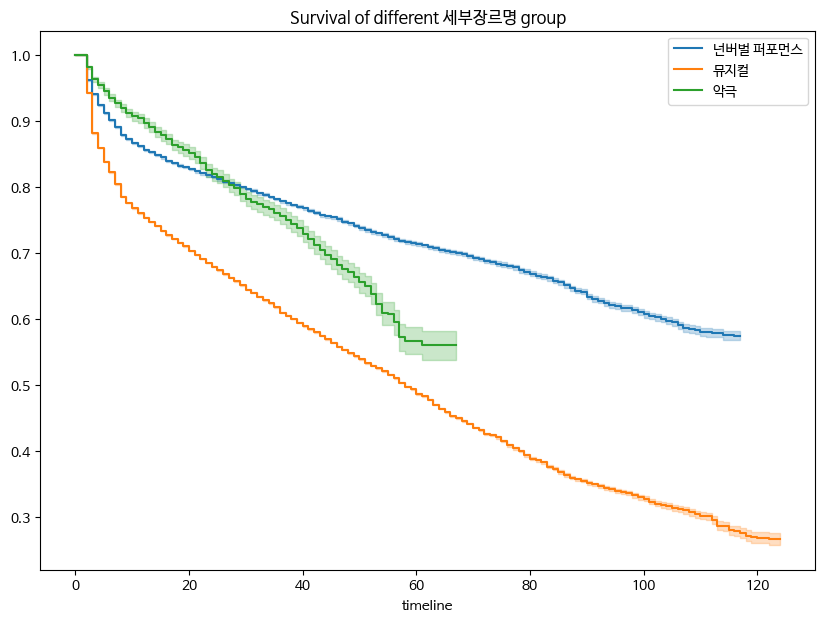

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
sgenre_types = musical.sort_values(by = ['세부장르명'])["세부장르명"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(sgenre_types):
  ix = musical['세부장르명'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 세부장르명 group")

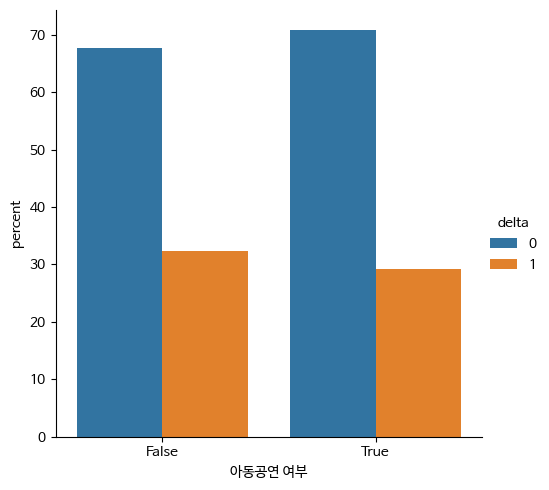

In [ ]:
# 아동공연여부
x,y = '아동공연 여부', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

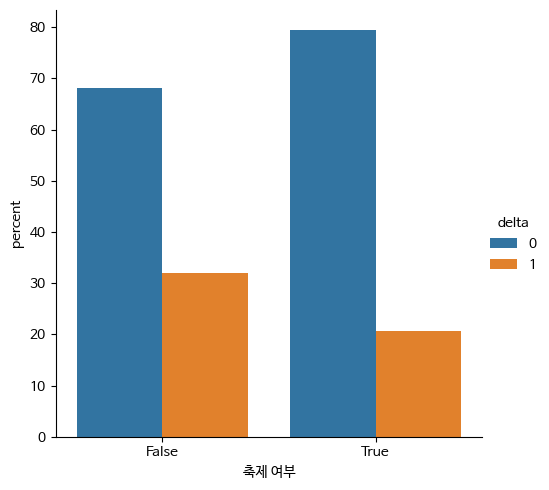

In [ ]:
# 축제 여부
x,y = '축제 여부', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

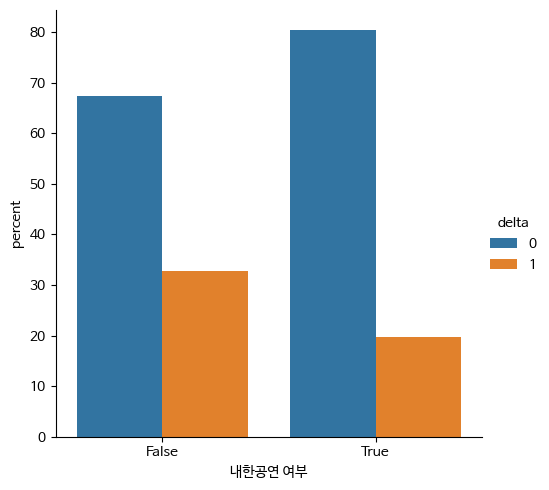

In [ ]:
# 내한공연 여부
x,y = '내한공연 여부', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

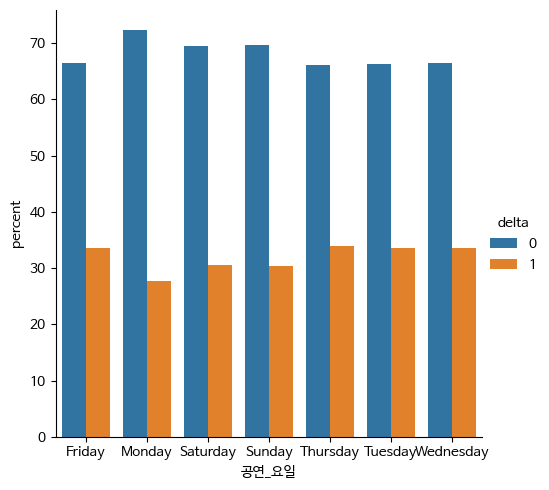

In [ ]:
# 공연_요일
x,y = '공연_요일', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

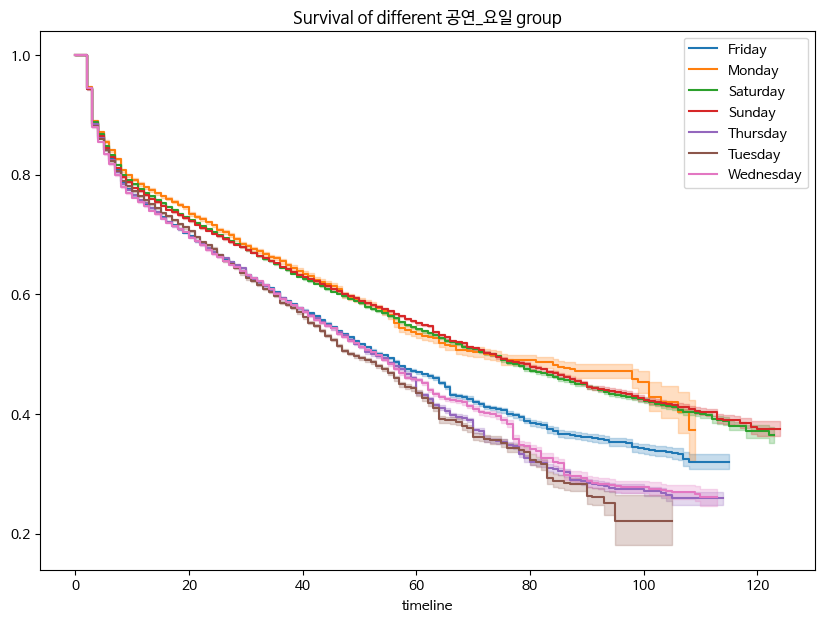

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
pw_types = musical.sort_values(by = ['공연_요일'])["공연_요일"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(pw_types):
  ix = musical['공연_요일'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 공연_요일 group")

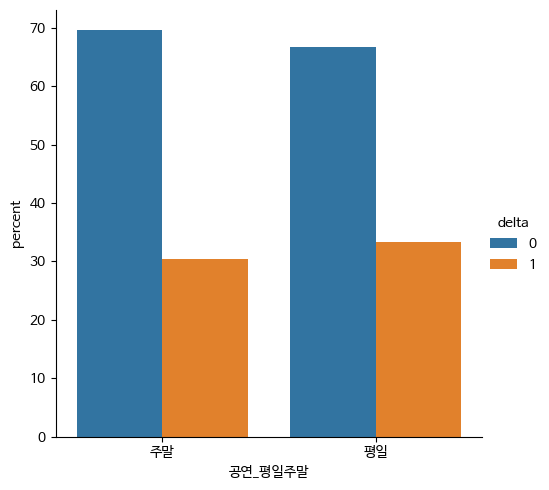

In [ ]:
# 공연_평일주말
x,y = '공연_평일주말', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

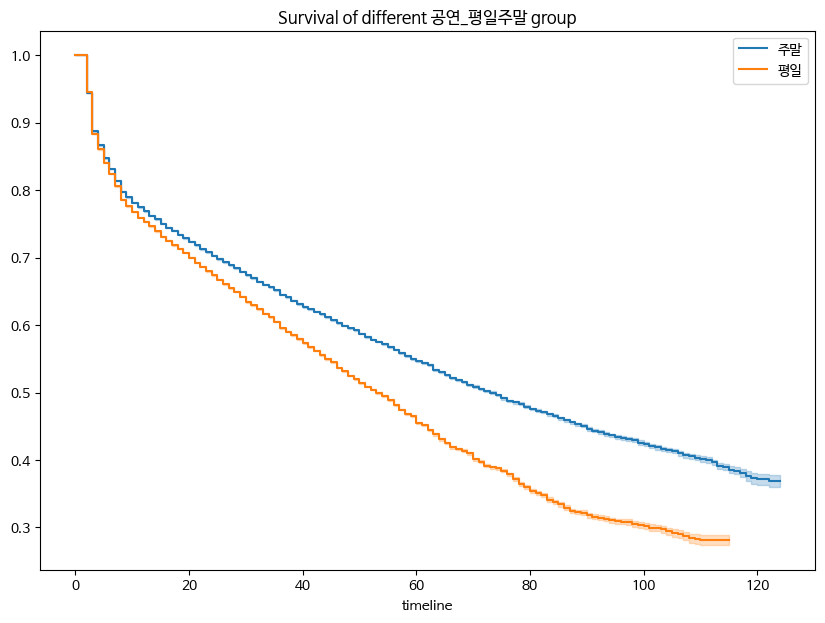

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
pw_types = musical.sort_values(by = ['공연_평일주말'])["공연_평일주말"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(pw_types):
  ix = musical['공연_평일주말'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 공연_평일주말 group")

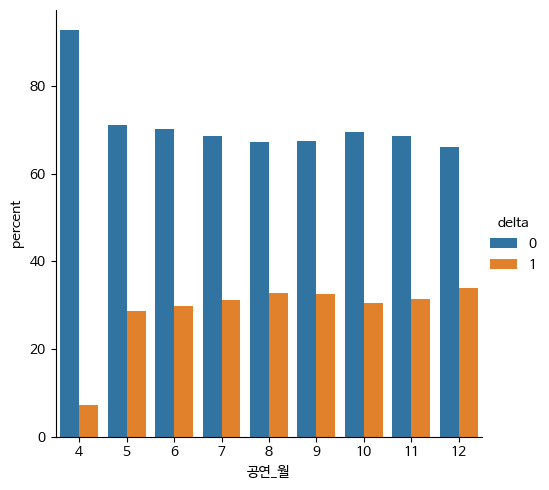

In [ ]:
# 공연_월
x,y = '공연_월', 'delta'

(musical
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

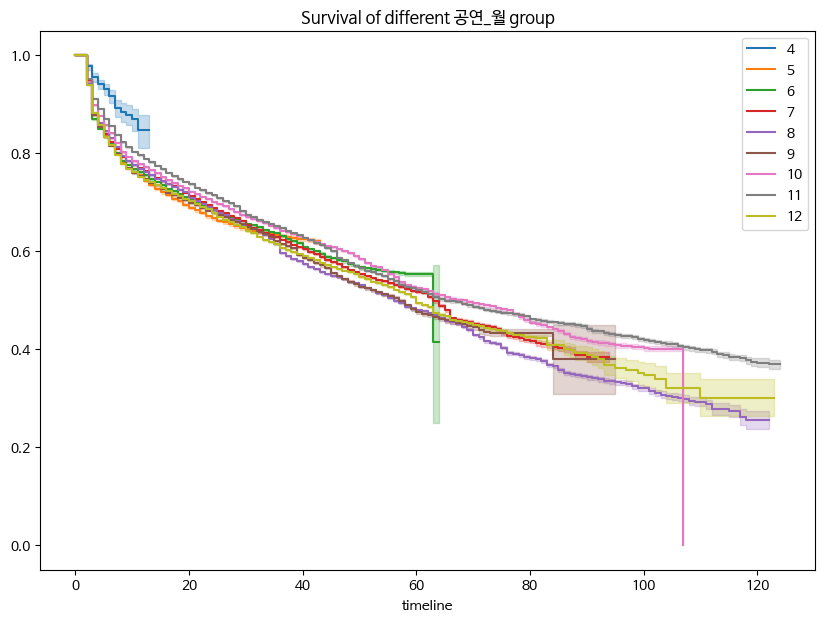

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
pw_types = musical.sort_values(by = ['공연_월'])["공연_월"].unique()
kmf = lifelines.KaplanMeierFitter()

for i, ss in enumerate(pw_types):
  ix = musical['공연_월'] == ss
  kmf.fit(durations = T[ix], event_observed = E[ix], label = ss)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different 공연_월 group")

<Axes: title={'center': 'Person Correlation of Features'}>

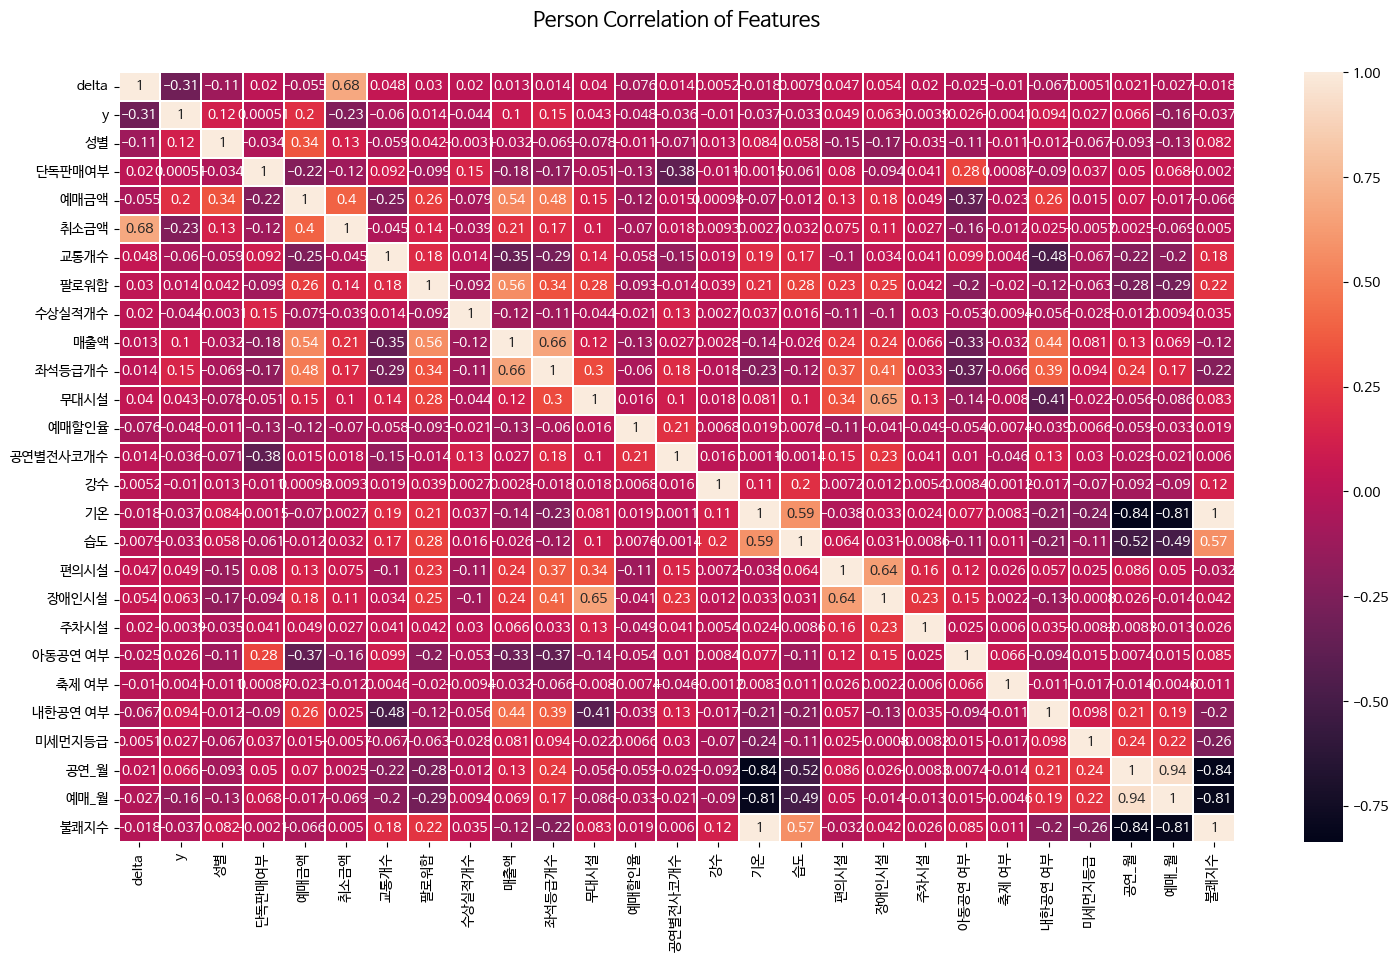

In [ ]:
plt.figure(figsize=(18, 10))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(musical.corr(), linewidths = 0.1, vmax = 1.0,
           linecolor = "white", annot = True)

## 판매기간별 group 추가

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv_unique.csv')
df

,공연시설코드,공연장코드,공연코드,입장권고유번호,판매시작일시,판매종료일시,예매일,취소일,공연일시,취소가능기간,group
0,FC222028,FC222028-01,PF343804,W2229628466001,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,A
1,FC222028,FC222028-01,PF343804,W2229628466002,2022-04-18 00:00:00,2022-04-18 17:15:00,2022-04-18 16:28:00,NaN,2022-04-18 17:15:00,1,A
2,FC222028,FC222028-01,PF343804,W2229226914001,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,A
3,FC222028,FC222028-01,PF343804,W2229226914002,2022-04-18 00:00:00,2022-04-19 15:00:00,2022-04-19 00:33:00,NaN,2022-04-19 15:00:00,2,A
4,FC223396,FC223396-01,PF307406,W2250065445001,2022-04-18 00:00:00,2022-04-19 16:55:00,2022-04-19 15:18:00,NaN,2022-04-19 17:00:00,2,A
...,...,...,...,...,...,...,...,...,...,...,...
10245761,FC224161,FC224161-01,PF426714,39539086152200047,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 15:32:00,NaN,2022-12-31 23:30:00,12,A
10245762,FC224161,FC224161-01,PF426714,39539092431600024,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:30:00,2022-12-30 16:41:00,2022-12-31 23:30:00,12,A
10245763,FC224161,FC224161-01,PF426714,39539092822300035,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:34:00,NaN,2022-12-31 23:30:00,12,A
10245764,FC224161,FC224161-01,PF426714,39539093471400046,2022-12-20 19:00:00,2022-12-30 17:00:00,2022-12-30 16:40:00,NaN,2022-12-31 23:30:00,12,A


In [ ]:
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/survival_df.csv', usecols=['입장권고유번호', 'delta', 'y'])
sdf.set_index('입장권고유번호', inplace=True)
sdf

,delta,y
입장권고유번호,,
W2229628466001,0,1
W2229628466002,0,1
W2229226914001,0,1
W2229226914002,0,1
W2250065445001,0,1
...,...,...
39539086152200047,0,2
39539092431600024,1,1
39539092822300035,0,2


In [ ]:
sdf.drop('PTD6512207131322340', inplace=True)

In [ ]:
sdf = pd.merge(sdf, df[['입장권고유번호', 'group']], left_index=True, right_on='입장권고유번호', how='left')
sdf.set_index('입장권고유번호', inplace=True)
sdf.isnull().sum()

delta    0
y        0
group    0
dtype: int64

In [ ]:
sdf

,delta,y,group
입장권고유번호,,,
W2229628466001,0,1,A
W2229628466002,0,1,A
W2229226914001,0,1,A
W2229226914002,0,1,A
W2250065445001,0,1,A
...,...,...,...
39539086152200047,0,2,A
39539092431600024,1,1,A
39539092822300035,0,2,A


In [ ]:
sdf.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/survival_df.csv')

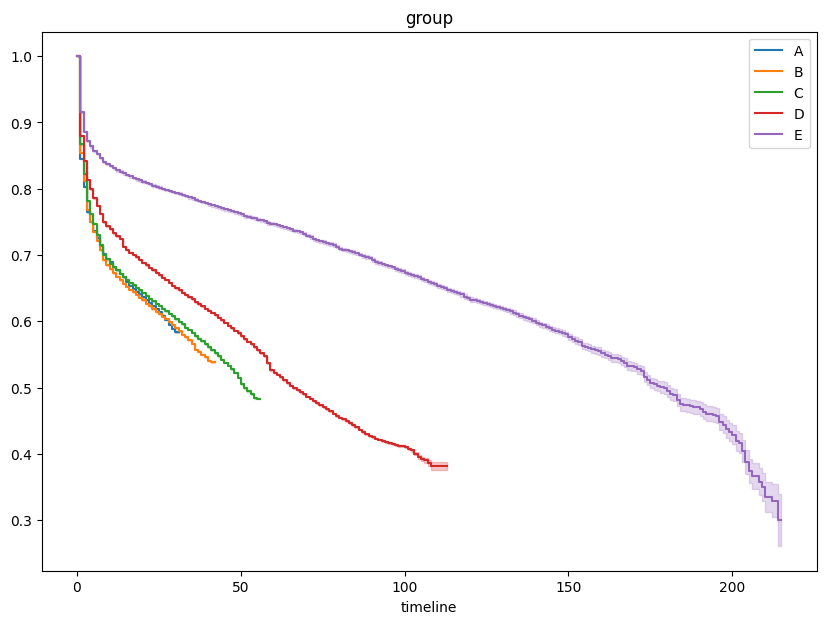

In [ ]:
# kaplain-meier
t = sdf['y'].values
delta = sdf['delta'].values

fig, ax = plt.subplots(figsize=(10,7))
group = 'group'
for name, df in sdf.groupby(group):
    idx = sdf[group] == name
    kmf = lifelines.KaplanMeierFitter().fit(t[idx], delta[idx], alpha=0.05, label=name)
    kmf.plot_survival_function(ax=ax)
plt.title(group);

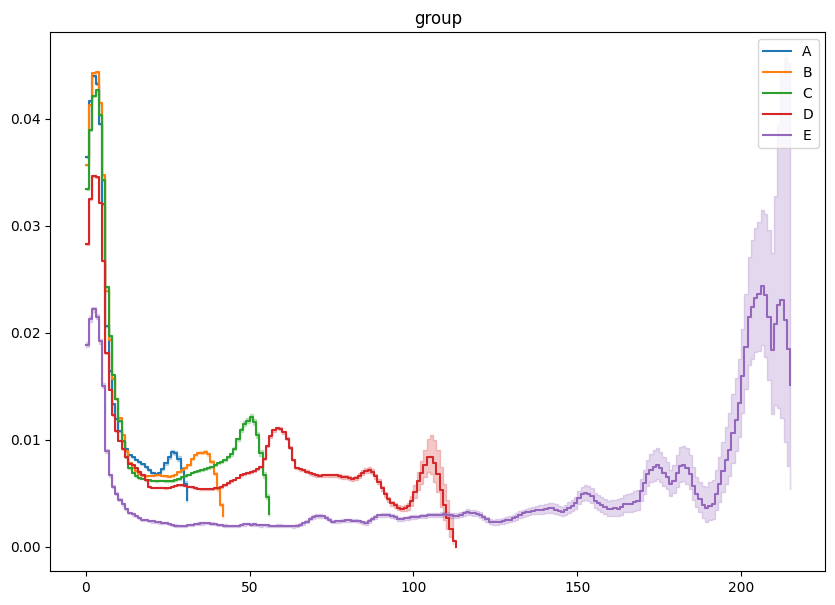

In [ ]:
# hazard rate : Nelson Aalen
fig, ax = plt.subplots(figsize=(10,7))
group = 'group'
for name, df in sdf.groupby(group):
    idx = sdf[group] == name
    naf = NelsonAalenFitter().fit(t[idx], delta[idx], label=name)
    naf.plot_hazard(ax=ax, bandwidth=5)
plt.title(group);

In [ ]:
sdf = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/survival_df.csv')
sdf.set_index('입장권고유번호', inplace=True)
sdf

,delta,y,group
입장권고유번호,,,
W2229628466001,0,1,A
W2229628466002,0,1,A
W2229226914001,0,1,A
W2229226914002,0,1,A
W2250065445001,0,1,A
...,...,...,...
39539086152200047,0,2,A
39539092431600024,1,1,A
39539092822300035,0,2,A


In [ ]:
gA = sdf[sdf['group']=='A'][['delta', 'y']]
gB = sdf[sdf['group']=='B'][['delta', 'y']]
gC = sdf[sdf['group']=='C'][['delta', 'y']]
gD = sdf[sdf['group']=='D'][['delta', 'y']]
gE = sdf[sdf['group']=='E'][['delta', 'y']]

In [ ]:
gA.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv')
gB.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupB.csv')
gC.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupC.csv')
gD.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupD.csv')
gE.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupE.csv')

## Survival Analysis 단변수 EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501878 entries, 0 to 2501877
Data columns (total 29 columns):
 #   Column    Dtype  
---  ------    -----  
 0   입장권고유번호   object 
 1   delta     int64  
 2   y         int64  
 3   공연시설인기    object 
 4   편의시설      int64  
 5   장애인시설     int64  
 6   주차시설      int64  
 7   교통개수      int64  
 8   팔로워합      float64
 9   수상실적개수    int64  
 10  매출액       float64
 11  좌석등급개수    int64  
 12  장르명       object 
 13  세부장르명     object 
 14  아동공연 여부   bool   
 15  축제 여부     bool   
 16  내한공연 여부   bool   
 17  단독판매여부    bool   
 18  성별        int64  
 19  예매금액      int64  
 20  취소금액      int64  
 21  예매할인율     float64
 22  공연별전사코개수  int64  
 23  무대시설      int64  
 24  총확진자      int64  
 25  강수        float64
 26  습도        float64
 27  기온        float64
 28  미세먼지등급    float64
dtypes: bool(4), float64(7), int64(14), object(4)
memory usage: 486.7+ MB


In [ ]:
df.isnull().sum()

입장권고유번호     0
delta       0
y           0
공연시설인기      0
편의시설        0
장애인시설       0
주차시설        0
교통개수        0
팔로워합        0
수상실적개수      0
매출액         0
좌석등급개수      0
장르명         0
세부장르명       0
아동공연 여부     0
축제 여부       0
내한공연 여부     0
단독판매여부      0
성별          0
예매금액        0
취소금액        0
예매할인율       0
공연별전사코개수    0
무대시설        0
총확진자        0
강수          0
습도          0
기온          0
미세먼지등급      0
dtype: int64

In [ ]:
T= df['y'].values
E = df['delta'].values

In [ ]:
df['성별'].value_counts()

2    1392223
0     870072
1     239583
Name: 성별, dtype: int64

Text(0.5, 1.0, 'Survival of different gender group')

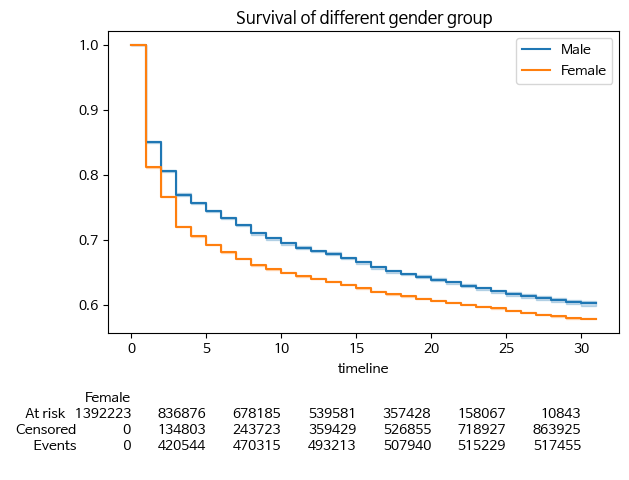

In [ ]:
ax = plt.subplot(111)
m = (df["성별"] == 1)
f = (df["성별"] == 2)
kmf = lifelines.KaplanMeierFitter()
kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax)
kmf.fit(T[f], event_observed = E[f], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)
plt.title("Survival of different gender group")

In [ ]:
df['장르명'].value_counts()

대중음악           963165
뮤지컬            906593
연극             299306
서양음악(클래식)      237792
무용(서양/한국무용)     47170
한국음악(국악)        27807
복합              14122
대중무용             3128
서커스/마술           2795
Name: 장르명, dtype: int64

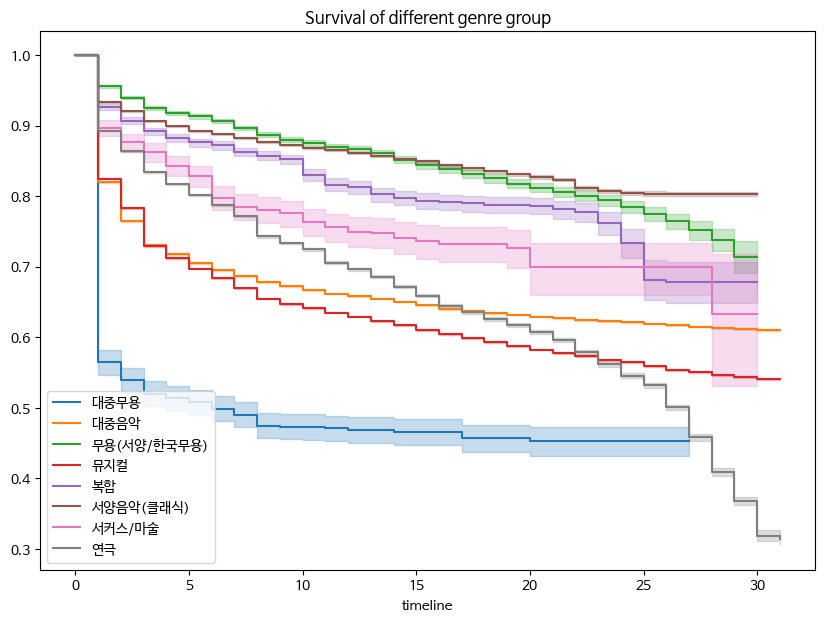

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
genre_types = df.sort_values(by = ['장르명'])["장르명"].unique()[:-1]
kmf = lifelines.KaplanMeierFitter()

for i, genre in enumerate(genre_types):
  ix = df['장르명'] == genre
  kmf.fit(durations = T[ix], event_observed = E[ix], label = genre)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different genre group")

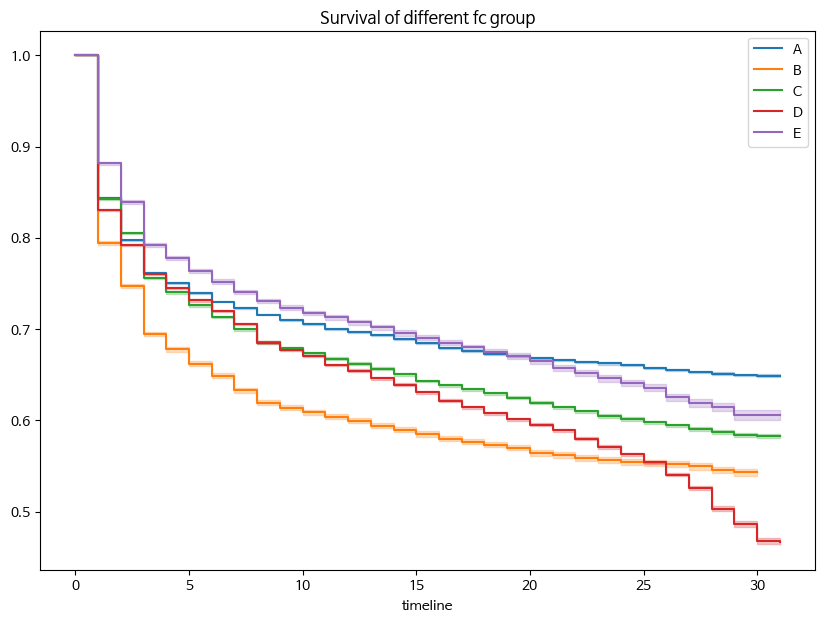

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
fc_types = df.sort_values(by = ['공연시설인기'])["공연시설인기"].unique()[:-1]
kmf = lifelines.KaplanMeierFitter()

for i, fc in enumerate(fc_types):
  ix = df['공연시설인기'] == fc
  kmf.fit(durations = T[ix], event_observed = E[ix], label = fc)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different fc group")

In [ ]:
df.sort_values(by = ['미세먼지등급'])["미세먼지등급"].unique()[:-1]

array([0., 1., 2.])

In [ ]:
df['미세먼지등급'].value_counts()

0.0    1505249
1.0     983343
2.0      12477
3.0        809
Name: 미세먼지등급, dtype: int64

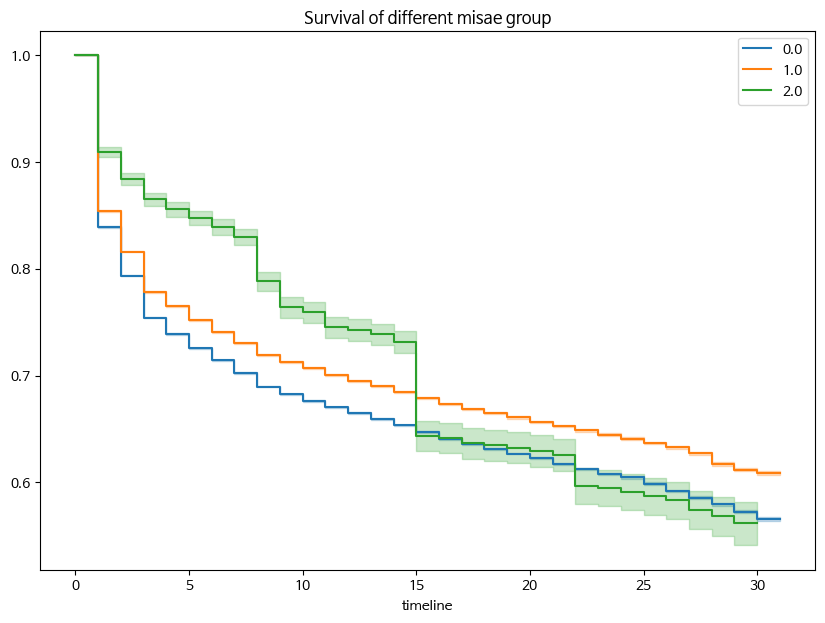

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
misae_types = df.sort_values(by = ['미세먼지등급'])["미세먼지등급"].unique()[:-1]
kmf = lifelines.KaplanMeierFitter()

for i, misae in enumerate(misae_types):
  ix = df['미세먼지등급'] == misae
  kmf.fit(durations = T[ix], event_observed = E[ix], label = misae)
  kmf.plot_survival_function(ax = ax)
  plt.title("Survival of different misae group")

# 이상한 입장권고유번호 drop하는 곳


In [ ]:
weird = []

In [ ]:
sample = df.groupby(['공연코드', '공연일시', '입장권고유번호', '예매/취소구분']).size().unstack(fill_value=0)
sample

예매/취소구분                                   1  2
공연코드     공연일시                입장권고유번호          
PF300000 2022-06-05 11:00:00 256606683_0  1  1
                             256606683_1  1  1
                             258094636_0  1  0
                             258094636_1  1  0
                             258094636_2  1  0
...                                      .. ..
PF433744 2022-07-14 11:00:00 T1984444830  1  1
                             T1984456240  1  0
                             T1984456241  1  0
                             T1984477340  1  0
                             T1984477341  1  0

[17076813 rows x 2 columns]

In [ ]:
sample[sample[1]<sample[2]]

예매/취소구분,공연코드,공연일시,입장권고유번호,1,2
0,PF300670,2022-07-30 19:00:00,W2273311399001,0,1
1,PF300853,2022-05-27 19:30:00,M220537330101,0,1
2,PF300853,2022-05-27 19:30:00,M220537330102,0,1
3,PF300853,2022-05-27 19:30:00,M220537330103,0,1
4,PF300853,2022-05-27 19:30:00,M224274331101,0,1
...,...,...,...,...,...
12221,PF426903,2022-12-30 19:00:00,213139,0,1
12222,PF426903,2022-12-30 19:00:00,213143,0,1
12223,PF426903,2022-12-30 19:00:00,213544,0,1
12224,PF426903,2022-12-30 19:00:00,213545,0,1


In [ ]:
weird += sample[sample[1]<sample[2]].reset_index()['입장권고유번호'].to_list()

In [ ]:
sample[sample[1]>1]

예매/취소구분                                         1  2
공연코드     공연일시                입장권고유번호                
PF310457 2022-10-25 19:30:00 0000805503         2  0
                             0000805504         2  0
                             0000805505         2  0
                             0000805506         2  0
                             0000805507         2  0
...                                            .. ..
PF424483 2022-12-06 19:30:00 0000808182         2  0
                             0000808207         2  0
                             0000808222         2  0
                             0000808223         2  0
PF425100 2022-12-17 19:00:00 20221209-859860-2  2  0

[655 rows x 2 columns]

In [ ]:
weird += sample[sample[1]>1].reset_index()['입장권고유번호'].to_list()

In [ ]:
sample[sample[2]>1]

예매/취소구분                                           1  2
공연코드     공연일시                입장권고유번호                  
PF312588 2022-06-03 19:30:00 20220510-140117      1  2
         2022-06-04 15:00:00 20220511-095534      1  2
PF313847 2022-05-30 19:30:00 PTD5412205231831170  1  2
PF315864 2022-07-08 19:00:00 20220627-835655-1    1  2
                             20220701-344903-1    1  2
                             20220701-344903-2    1  2
                             20220701-344903-3    1  2
                             20220701-344903-4    1  2
                             20220701-344903-5    1  2
PF317307 2022-08-27 15:00:00 20220726-141504      1  2
                             20220726-160653      1  2
                             20220817-141832      1  2
PF318186 2022-09-01 19:00:00 20220825-802091-1    1  2
                             20220825-802091-2    1  2
                             20220825-802091-3    1  2
PF422801 2022-11-06 15:00:00 PTD2392210231539103  1  2
                             PTD4392210231539104  1  2
PF425100 2022-12-17 19:00:00 20221210-812092-3    1  2
PF425767 2022-12-15 19:30:00 20221206-091689-1    1  2
                             20221206-091689-2    1  2
                             20221206-967911-2    1  2
                             20221206-967911-3    1  2

In [ ]:
df[df['입장권고유번호']=='0000805503']

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간
14119072,FC222206,FC222206-01,PF310457,2022-10-25 19:30:00,0000805503,2022-09-15 07:09:00,1,2022-09-15 02:09:00,2022-10-24 11:10:00,40
14119274,FC222206,FC222206-01,PF310457,2022-10-25 19:30:00,0000805503,2022-10-14 08:10:00,1,2022-09-15 02:09:00,2022-10-24 11:10:00,40


In [ ]:
df[df['입장권고유번호']=='20220510-140117']
# 여기 취소건 보면 같은 공연코드 같은 공연일시인데 판매종료가 다름

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간
954563,FC222952,FC222952-01,PF312588,2022-06-03 19:30:00,20220510-140117,2022-05-10 14:01:00,1,2022-05-03 00:00:00,2022-06-02 00:00:00,31
954631,FC222952,FC222952-01,PF312588,2022-06-03 19:30:00,20220510-140117,2022-05-10 14:01:00,2,2022-05-03 00:00:00,2022-06-02 00:00:00,31
954732,FC222952,FC222952-01,PF312588,2022-06-03 19:30:00,20220510-140117,2022-05-10 14:01:00,2,2022-05-03 00:00:00,2022-06-03 00:00:00,32


In [ ]:
weird = set(weird)

df = df.drop(df[df['입장권고유번호'].isin(weird)].index)
df

,공연시설코드,공연장코드,공연코드,공연일시,입장권고유번호,예매/취소일시,예매/취소구분,판매시작일시,판매종료일시,판매기간
0,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466001,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
1,FC222028,FC222028-01,PF343804,2022-04-18 17:15:00,W2229628466002,2022-04-18 16:28:00,1,2022-04-18 00:00:00,2022-04-18 17:15:00,1
2,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914001,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
3,FC222028,FC222028-01,PF343804,2022-04-19 15:00:00,W2229226914002,2022-04-19 00:33:00,1,2022-04-18 00:00:00,2022-04-19 15:00:00,2
4,FC223396,FC223396-01,PF307406,2022-04-19 17:00:00,W2250065445001,2022-04-19 15:18:00,1,2022-04-18 00:00:00,2022-04-19 16:55:00,2
...,...,...,...,...,...,...,...,...,...,...
22678557,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:30:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
22678558,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092431600024,2022-12-30 16:41:00,2,2022-12-20 19:00:00,2022-12-30 17:00:00,10
22678559,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539092822300035,2022-12-30 16:34:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10
22678560,FC224161,FC224161-01,PF426714,2022-12-31 23:30:00,39539093471400046,2022-12-30 16:40:00,1,2022-12-20 19:00:00,2022-12-30 17:00:00,10


In [ ]:
len(weird)

12881

In [ ]:
df.to_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/YM/2022YM_surv.csv', index=False)

In [ ]:
check = df.groupby(['공연코드', '공연일시', '입장권고유번호', '예매/취소구분']).size().unstack(fill_value=0)
check[check[1]<check[2]]

,,예매/취소구분,1,2
공연코드,공연일시,입장권고유번호,,


In [ ]:
check[check[1]>1]

,,예매/취소구분,1,2
공연코드,공연일시,입장권고유번호,,


# EDA

## groupA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/Survival Analysis/groupA.csv')
df.set_index('입장권고유번호', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2501878 entries, W2229628466001 to 39539093721600024
Data columns (total 28 columns):
 #   Column    Dtype  
---  ------    -----  
 0   delta     int64  
 1   y         int64  
 2   공연시설인기    object 
 3   편의시설      int64  
 4   장애인시설     int64  
 5   주차시설      int64  
 6   교통개수      int64  
 7   팔로워합      float64
 8   수상실적개수    int64  
 9   매출액       float64
 10  좌석등급개수    int64  
 11  장르명       object 
 12  세부장르명     object 
 13  아동공연 여부   bool   
 14  축제 여부     bool   
 15  내한공연 여부   bool   
 16  단독판매여부    bool   
 17  성별        int64  
 18  예매금액      int64  
 19  취소금액      int64  
 20  예매할인율     float64
 21  공연별전사코개수  int64  
 22  무대시설      int64  
 23  총확진자      int64  
 24  강수        float64
 25  습도        float64
 26  기온        float64
 27  미세먼지등급    float64
dtypes: bool(4), float64(7), int64(14), object(3)
memory usage: 486.7+ MB


<Axes: xlabel='공연시설인기', ylabel='y'>

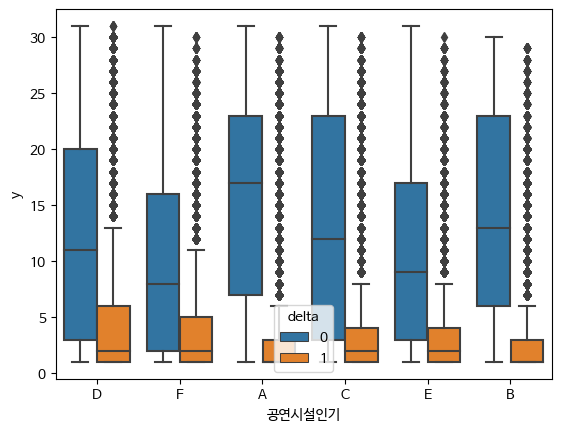

In [ ]:
sns.boxplot(x='공연시설인기', y='y', hue='delta', data=df)

<Axes: xlabel='편의시설', ylabel='y'>

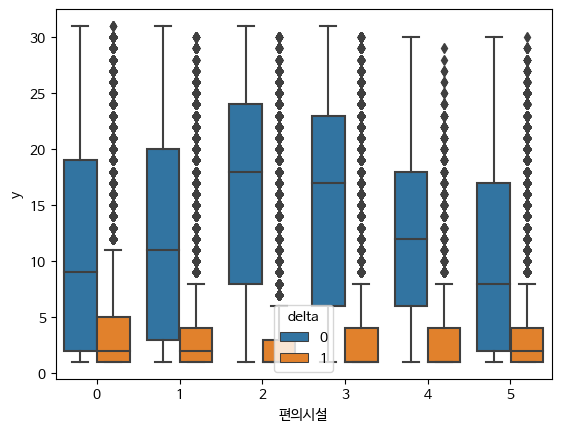

In [ ]:
sns.boxplot(x='편의시설', y='y', hue='delta', data=df)

<Axes: xlabel='장애인시설', ylabel='y'>

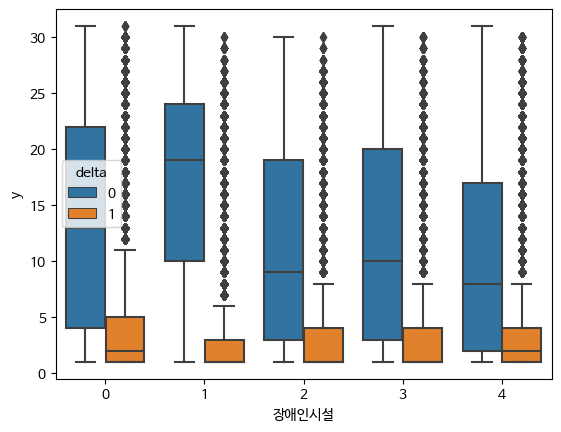

In [ ]:
sns.boxplot(x='장애인시설', y='y', hue='delta', data=df)

## 장르별로 취소율이 유사한가

In [ ]:
df2 = df.groupby(['공연코드', '공연일시', '예매/취소구분']).size().unstack(fill_value=0)
df2

예매/취소구분                         1    2
공연코드     공연일시                         
PF300000 2022-06-05 11:00:00  276  100
         2022-06-05 14:00:00  267   75
PF300001 2022-05-24 20:00:00  187  106
         2022-05-25 20:00:00  175   75
         2022-05-26 16:00:00  121   56
...                           ...  ...
PF433734 2022-10-15 17:00:00  484  168
PF433738 2022-11-22 19:00:00  249   53
PF433742 2022-06-19 11:00:00   47    7
         2022-06-19 14:00:00   40    6
PF433744 2022-07-14 11:00:00  510  149

[55405 rows x 2 columns]

In [ ]:
df2['취소율'] = df2[2] / (df2[1]+df2[2]) *100
df2

예매/취소구분                         1    2        취소율
공연코드     공연일시                                    
PF300000 2022-06-05 11:00:00  276  100  26.595745
         2022-06-05 14:00:00  267   75  21.929825
PF300001 2022-05-24 20:00:00  187  106  36.177474
         2022-05-25 20:00:00  175   75  30.000000
         2022-05-26 16:00:00  121   56  31.638418
...                           ...  ...        ...
PF433734 2022-10-15 17:00:00  484  168  25.766871
PF433738 2022-11-22 19:00:00  249   53  17.549669
PF433742 2022-06-19 11:00:00   47    7  12.962963
         2022-06-19 14:00:00   40    6  13.043478
PF433744 2022-07-14 11:00:00  510  149  22.610015

[55405 rows x 3 columns]

In [ ]:
df2.reset_index(inplace=True)
df2

예매/취소구분,공연코드,공연일시,1,2,취소율
0,PF300000,2022-06-05 11:00:00,276,100,26.595745
1,PF300000,2022-06-05 14:00:00,267,75,21.929825
2,PF300001,2022-05-24 20:00:00,187,106,36.177474
3,PF300001,2022-05-25 20:00:00,175,75,30.000000
4,PF300001,2022-05-26 16:00:00,121,56,31.638418
...,...,...,...,...,...
55400,PF433734,2022-10-15 17:00:00,484,168,25.766871
55401,PF433738,2022-11-22 19:00:00,249,53,17.549669
55402,PF433742,2022-06-19 11:00:00,47,7,12.962963
55403,PF433742,2022-06-19 14:00:00,40,6,13.043478


In [ ]:
cd_gr = pd.read_csv('/content/drive/MyDrive/KOPIS DATA/Data/csv/all/CO/2022CO.csv', usecols=['공연코드', '장르명']).drop_duplicates()
cd_gr

,공연코드,장르명
0,PF306057,서커스/마술
1,PF303848,뮤지컬
2,PF304598,뮤지컬
3,PF304053,뮤지컬
4,PF391432,뮤지컬
...,...,...
17925,PF426633,대중음악
17926,PF426665,대중음악
17927,PF425870,대중음악
17928,PF424726,서양음악(클래식)


In [ ]:
df_gr = pd.merge(df2, cd_gr, on='공연코드', how='left')
df_gr

,공연코드,공연일시,1,2,취소율,장르명
0,PF300000,2022-06-05 11:00:00,276,100,26.595745,뮤지컬
1,PF300000,2022-06-05 14:00:00,267,75,21.929825,뮤지컬
2,PF300001,2022-05-24 20:00:00,187,106,36.177474,연극
3,PF300001,2022-05-25 20:00:00,175,75,30.000000,연극
4,PF300001,2022-05-26 16:00:00,121,56,31.638418,연극
...,...,...,...,...,...,...
55400,PF433734,2022-10-15 17:00:00,484,168,25.766871,서양음악(클래식)
55401,PF433738,2022-11-22 19:00:00,249,53,17.549669,뮤지컬
55402,PF433742,2022-06-19 11:00:00,47,7,12.962963,서커스/마술
55403,PF433742,2022-06-19 14:00:00,40,6,13.043478,서커스/마술


In [ ]:
df_gr.groupby('장르명')['취소율'].mean()

장르명
대중무용           21.311162
대중음악           22.477442
무용(서양/한국무용)    13.151266
뮤지컬            20.937334
복합              8.311027
서양음악(클래식)      12.727413
서커스/마술         14.064731
연극             12.008861
한국음악(국악)       14.279039
Name: 취소율, dtype: float64

<Axes: xlabel='장르명', ylabel='취소율'>

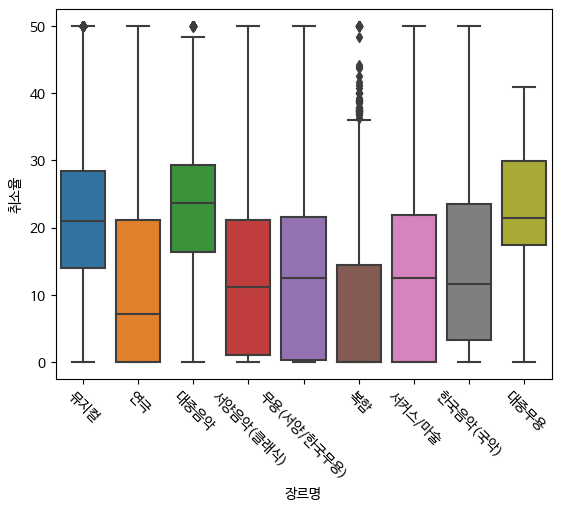

In [ ]:
plt.xticks(rotation=-45)
sns.boxplot(x='장르명', y='취소율', data=df_gr)

- 눈에 띄는 장르는 뮤지컬, 대중음악, 대중무용 or 한국음악(국악), 복합